In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 정규시즌 날짜별 데이터 통계분석

In [3]:
anal_batter = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
anal_batter.head(5)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


- batter_id: 타자의 고유 ID
- batter_name: 타자 이름
- date: 경기 날짜
- opposing_team: 상대 팀 이름
- avg1: 경기 전 평균 타율
- AB: 타수
- R: 득점
- H: 안타
- 2B: 2루타
- 3B: 3루타
- HR: 홈런
- RBI: 타점
- SB: 도루
- CS: 도루실패
- BB: 볼넷
- HBP: 사구
- SO: 삼진
- GDP: 병살타
- avg2: 경기 후 평균 타율
- year: 년도

In [7]:
# 데이터의 기본적인 정보 확인

anal_batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112273 entries, 0 to 112272
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   batter_id      112273 non-null  int64  
 1   batter_name    112273 non-null  object 
 2   date           112273 non-null  float64
 3   opposing_team  112273 non-null  object 
 4   avg1           112273 non-null  object 
 5   AB             112273 non-null  int64  
 6   R              112273 non-null  int64  
 7   H              112273 non-null  int64  
 8   2B             112273 non-null  int64  
 9   3B             112273 non-null  int64  
 10  HR             112273 non-null  int64  
 11  RBI            112273 non-null  int64  
 12  SB             112273 non-null  int64  
 13  CS             112273 non-null  int64  
 14  BB             112273 non-null  int64  
 15  HBP            112273 non-null  int64  
 16  SO             112273 non-null  int64  
 17  GDP            112273 non-nul

- 총 112,273개의 row와 20개의 column
- 결측치 없음
- date항목이 float64 -> 날짜 형식으로 변환하는 것이 좋을 것으로 보임
- avg1항목이 object타입 -> 숫자로 변환해야할 필요성이 보임

In [8]:
# 기초 통계량 확인

anal_batter.describe()

,batter_id,date,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
count,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000,112273.000000
mean,169.777640,6.704952,2.835909,0.432847,0.798732,0.140060,0.014135,0.079556,0.398359,0.073669,0.032225,0.291807,0.050315,0.558808,0.063452,0.267828,2013.436953
std,93.525691,1.822063,1.540520,0.676963,0.914338,0.377159,0.119474,0.289990,0.809377,0.288701,0.179301,0.556228,0.226480,0.734793,0.252075,0.086403,3.973192
min,0.000000,3.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000
25%,96.000000,5.160000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236000,2011.000000
50%,167.000000,6.290000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276000,2014.000000
75%,250.000000,8.190000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.311000,2017.000000
max,344.000000,10.200000,7.000000,5.000000,6.000000,3.000000,3.000000,4.000000,9.000000,5.000000,2.000000,6.000000,3.000000,5.000000,3.000000,1.000000,2018.000000


- AB(타수)의 평균은 약 2.84, 이는 대부분의 선수가 게임당 2~3타수를 기록하는 것을 의미
- R(득점)의 평균은 0.43으로, 매 선수가 매 경기마다 득점을 기록하는 것은 아님
- H(안타)의 평균은 0.8, 게임당 대부분의 선수가 1안타 이하를 기록하는 것으로 보임
- HR(홈런)의 평균은 0.08로, 홈런이라는 이벤트는 자주 발생하지 않는 것을 알 수 있음
- 'year'(연도) 항목을 보아 이 데이터는 2001년부터 2018년까지의 기록임을 알 수 있음

### 주요 변수들의 통계량의 분포와 연도별 통계량 변화 시각화

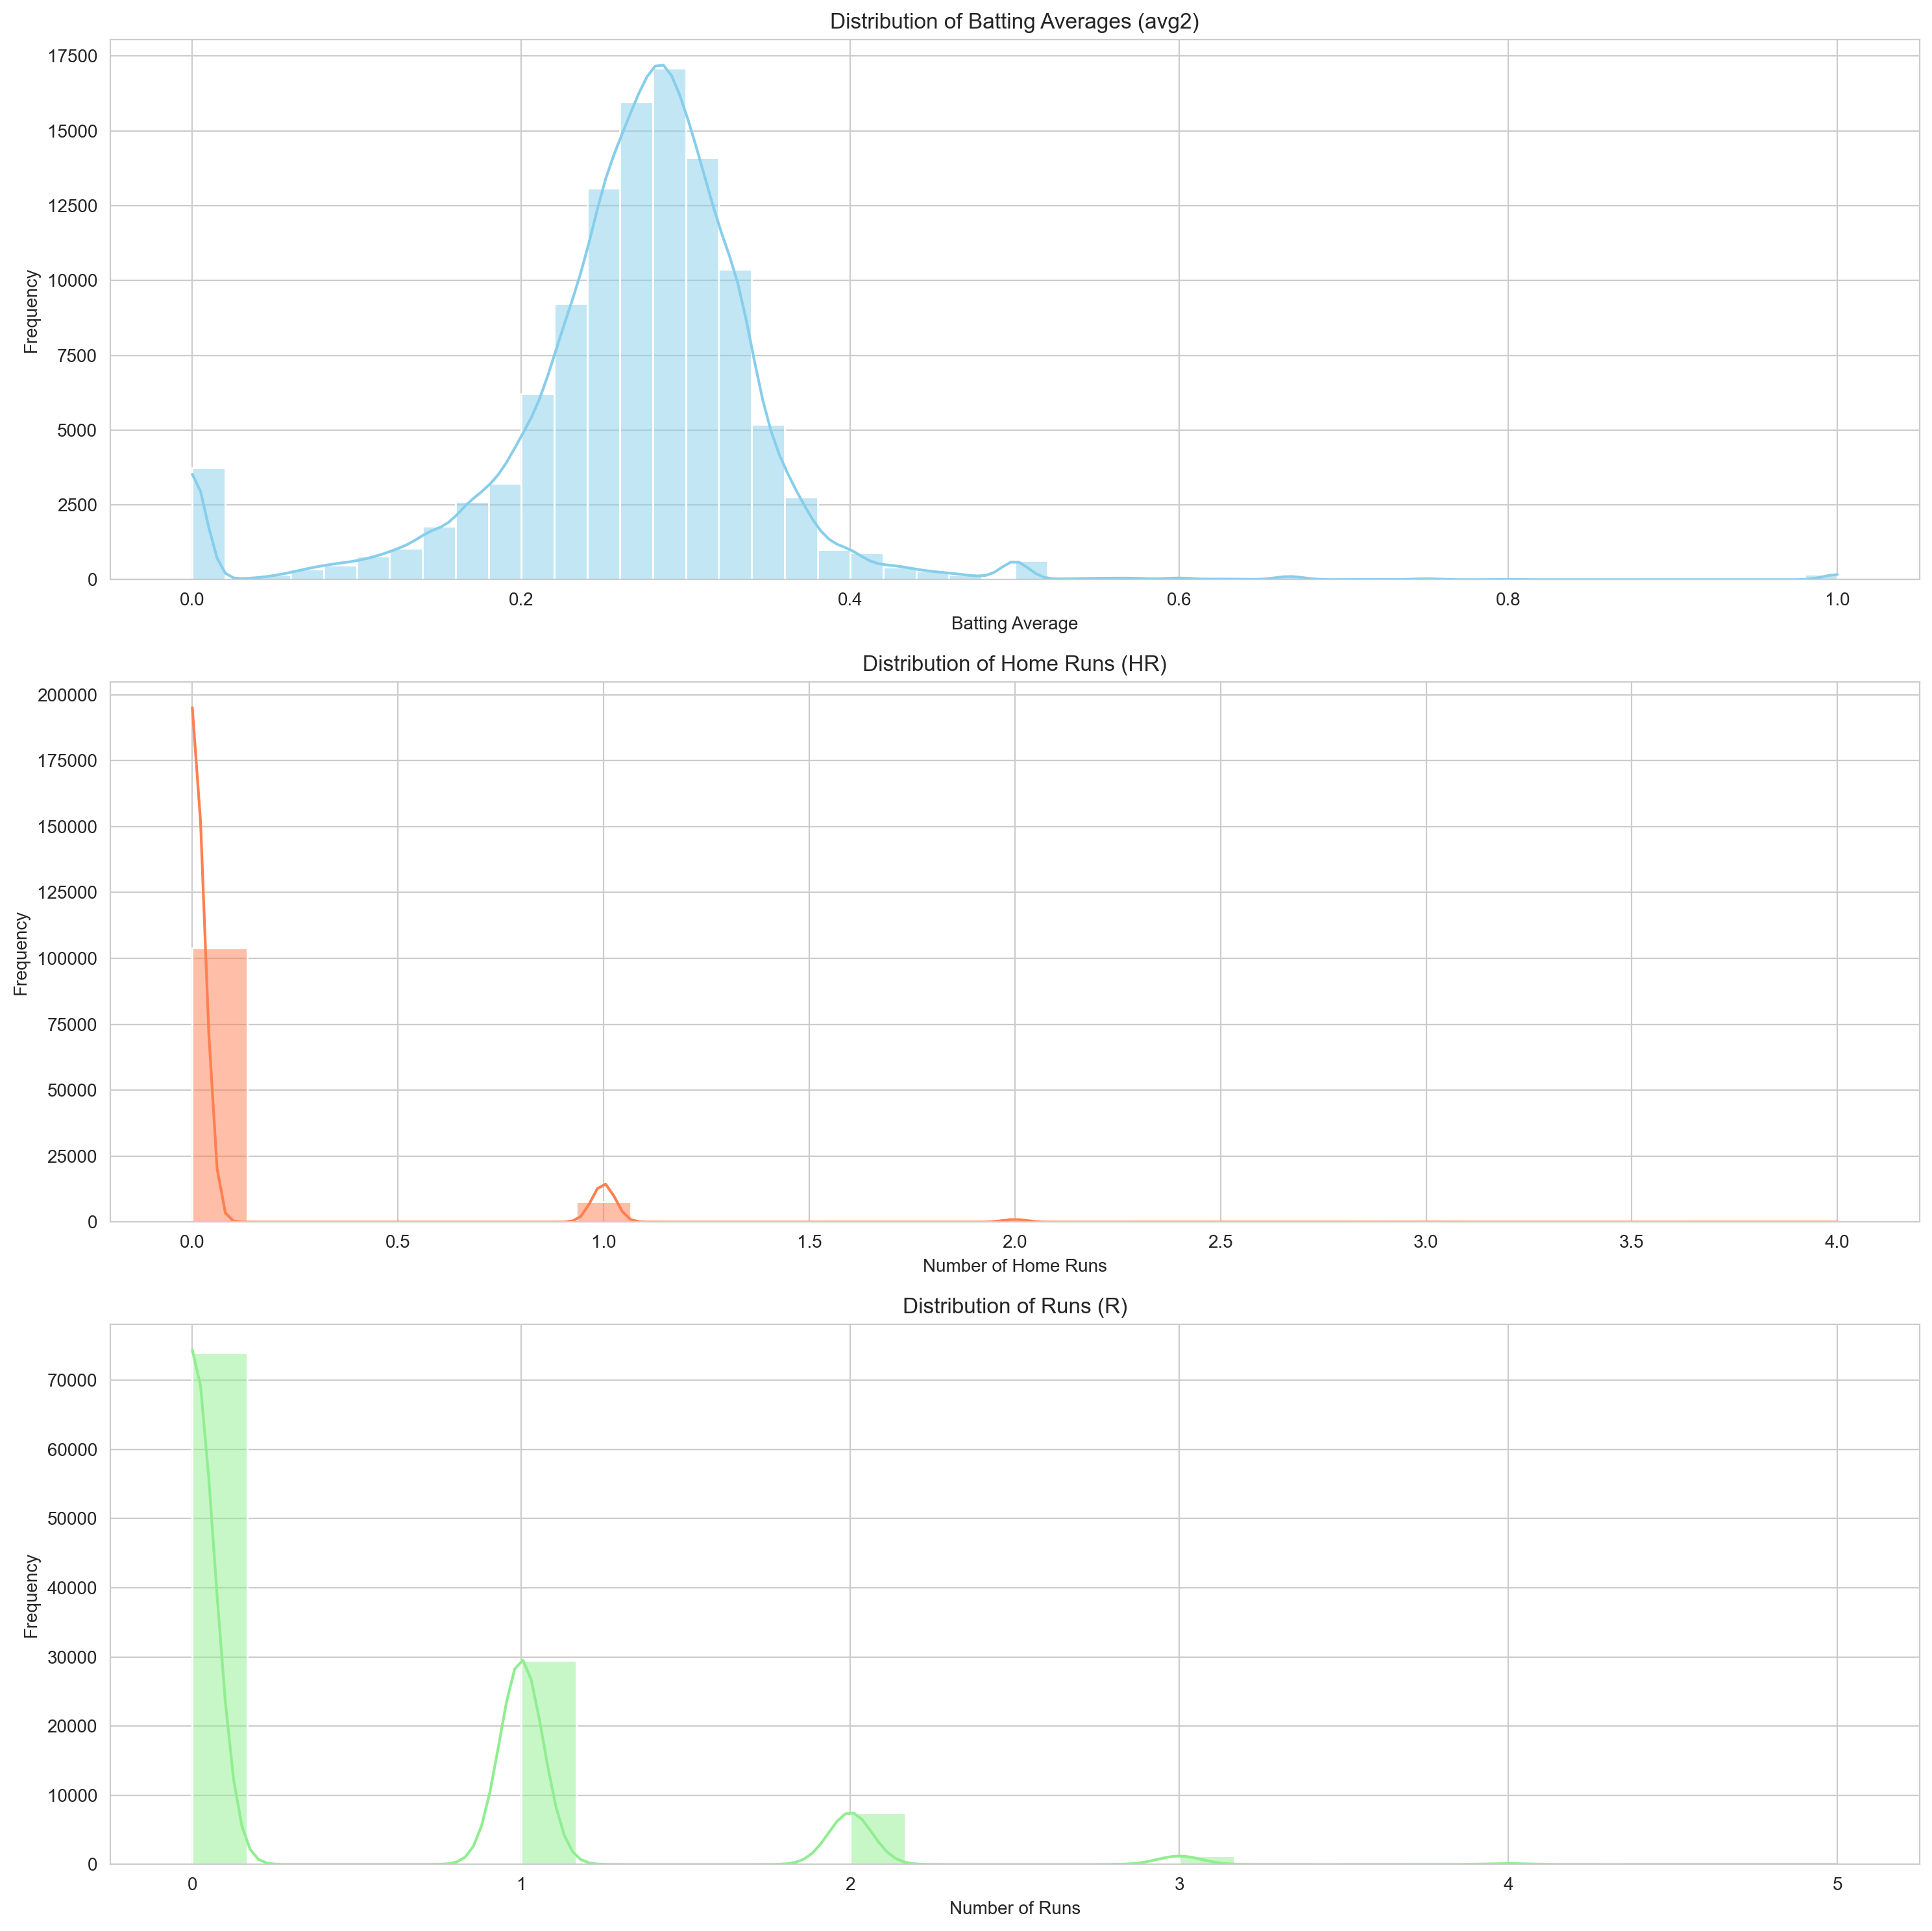

In [17]:
sns.set_style("whitegrid")

# 타율(avg2), 홈런(HR), 득점(R) 분포 확인
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

sns.histplot(anal_batter['avg2'], bins=50, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Batting Averages (avg2)')
axes[0].set_xlabel('Batting Average')
axes[0].set_ylabel('Frequency')

sns.histplot(anal_batter['HR'], bins=30, ax=axes[1], color='coral', kde=True)
axes[1].set_title('Distribution of Home Runs (HR)')
axes[1].set_xlabel('Number of Home Runs')
axes[1].set_ylabel('Frequency')

sns.histplot(anal_batter['R'], bins=30, ax=axes[2], color='lightgreen', kde=True)
axes[2].set_title('Distribution of Runs (R)')
axes[2].set_xlabel('Number of Runs')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. 타율(avg2) 분포
    - 대부분의 선수들 타율은 0.2~0.4 사이에 분포
    - 타율 0.3을 중심으로 정규분포 형태와 비슷하게 분포
    - 몇몇 선수들은 타율이 1.0인 것으로 보이는데, 짐작컨대 시즌 초반 몇몇의 모든 타석에서 모두 안타를 친 경우일 것으로 예상
    
2. 홈런(HR) 분포
    - 대부분의 선수들은 게임당 1홈런 미만
    - 1개 이상을 친 경우는 매우 드물며, 3홈런 이상을 친 경우는 극히 드문 것으로 보임

3. 득점(R) 분포
    - 대부분의 선수들은 게임당 1득점 이하를 기록
    - 2득점 이상인 경우는 드물며, 4득점은 매우 드문 것으로 보임

In [21]:
anal_batter.columns

Index(['batter_id', 'batter_name', 'date', 'opposing_team', 'avg1', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'avg2', 'year'],
      dtype='object')

### 연도 별 주요 통계량의 평균 변화

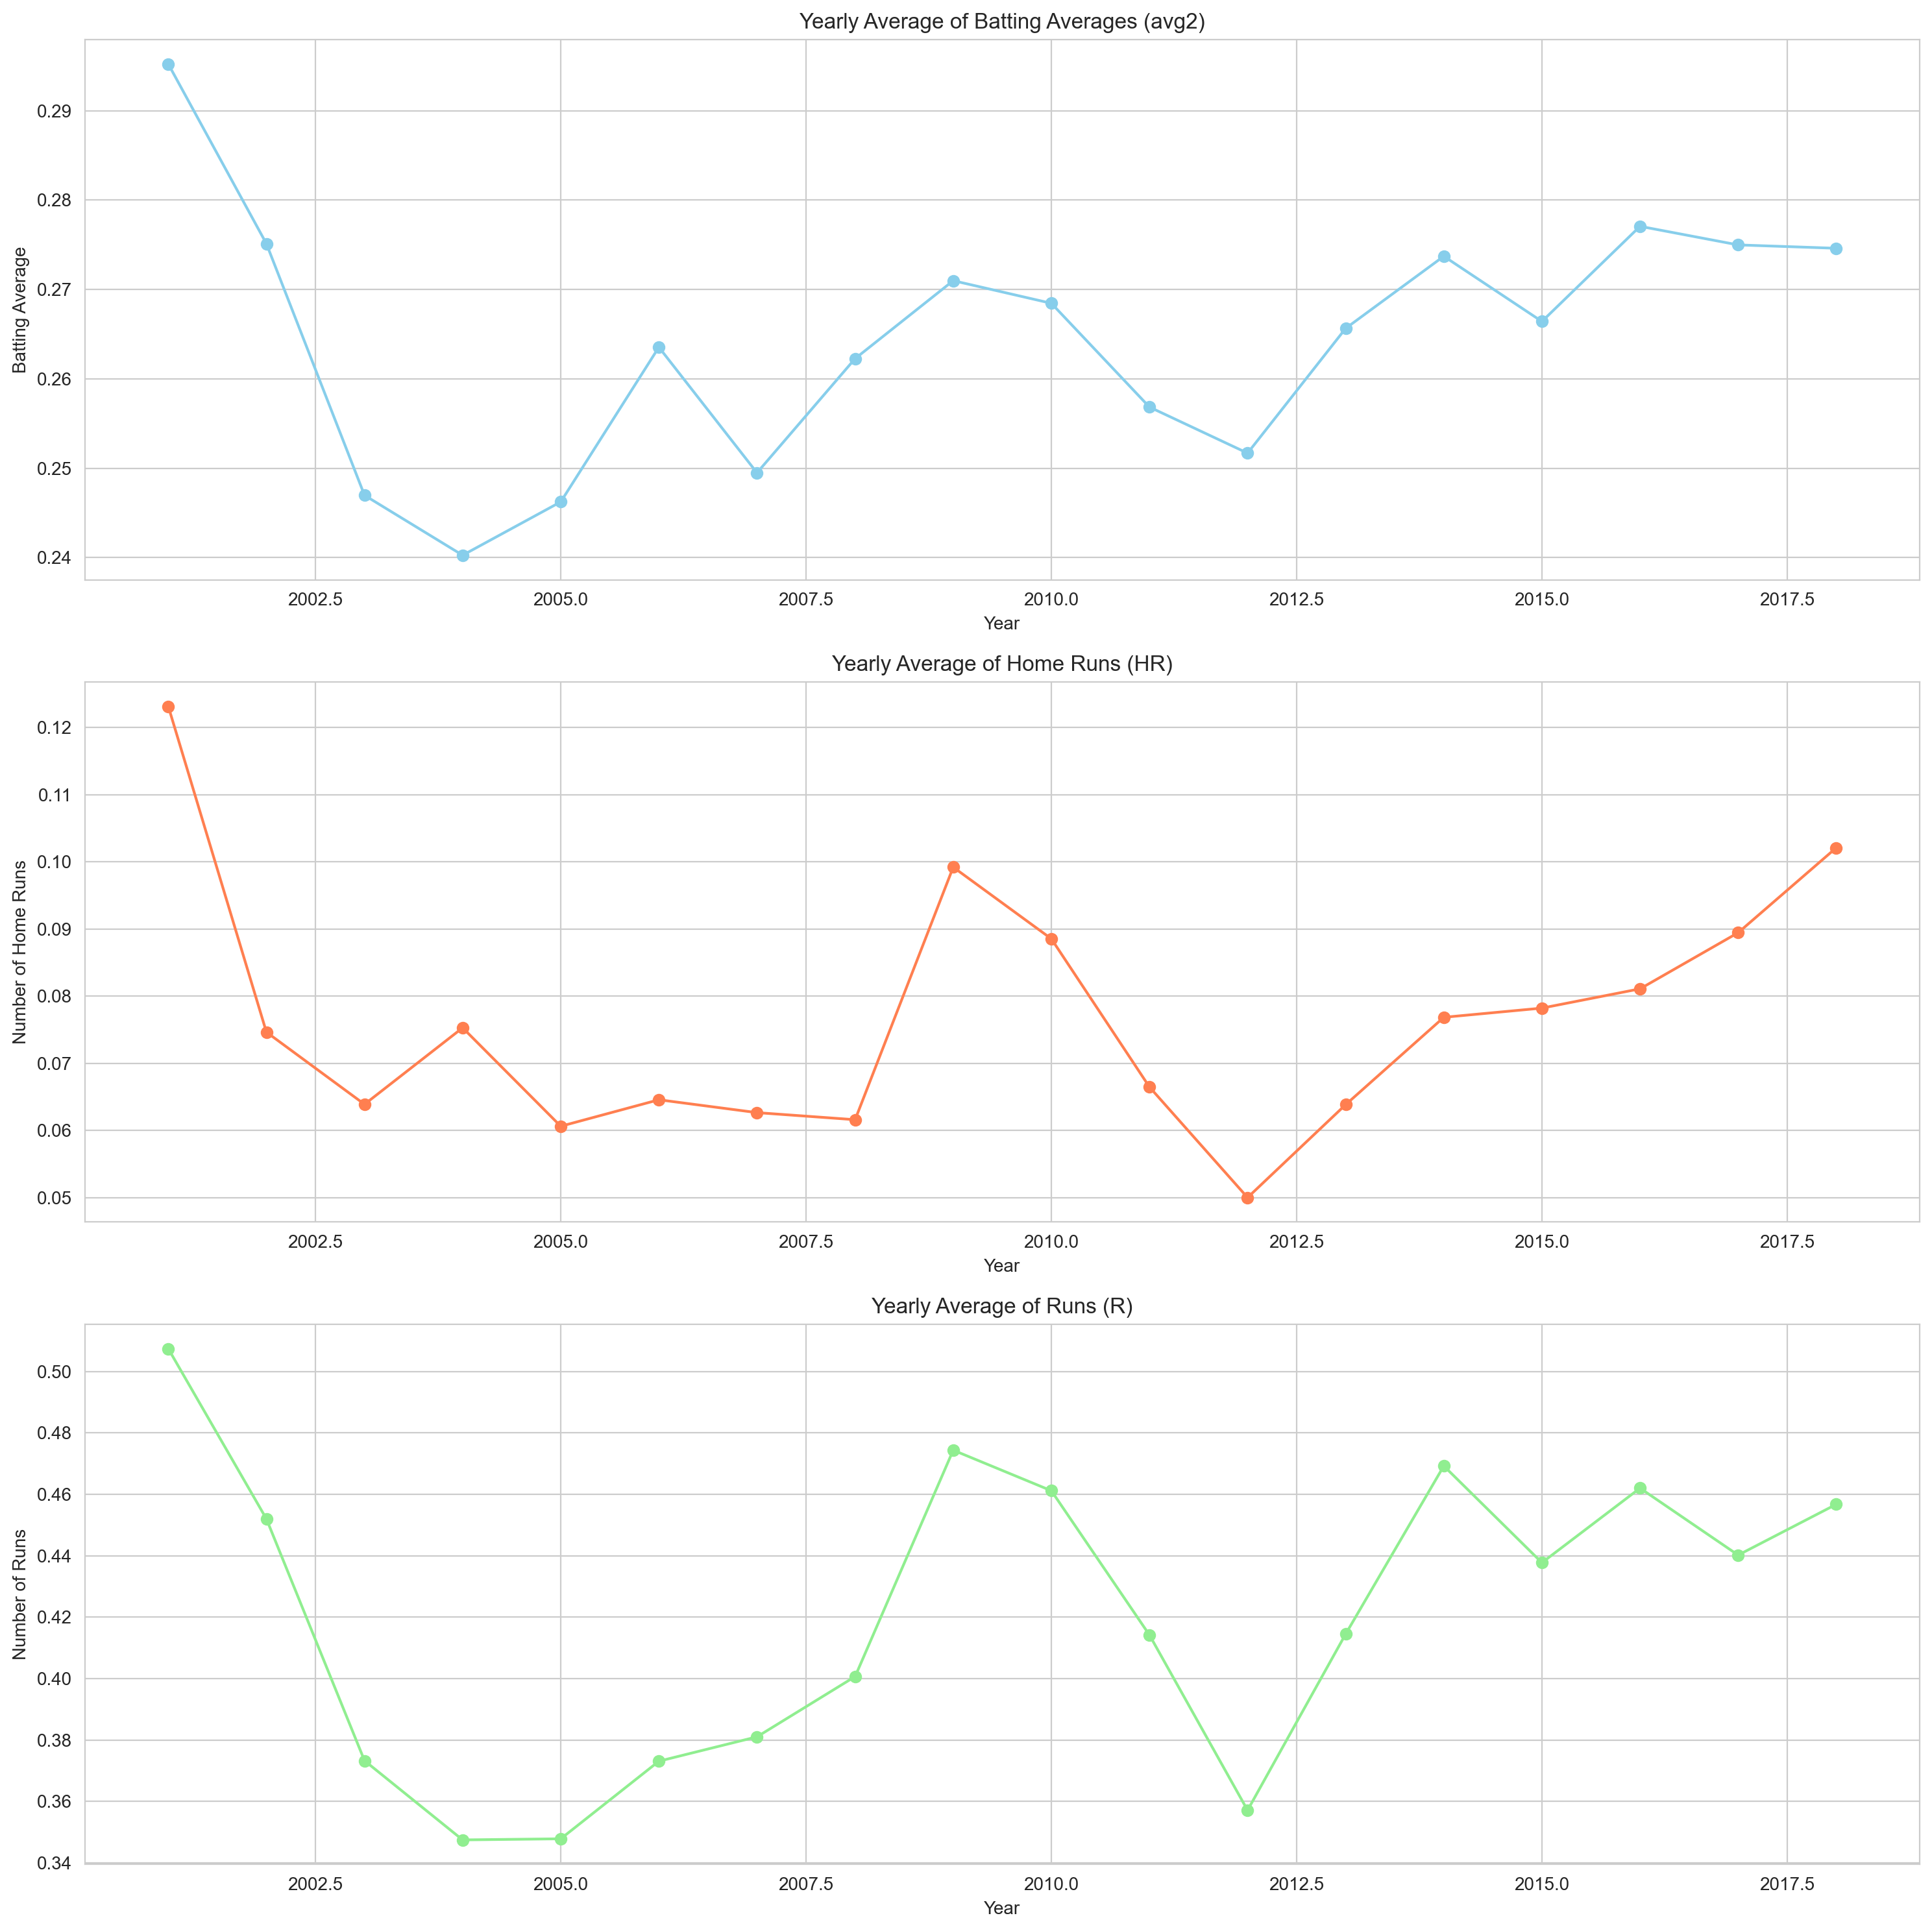

In [22]:
yearly_avg = anal_batter.groupby('year')[['avg2', 'HR', 'R']].mean()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# 연도별 타율(avg2) 평균 변화
axes[0].plot(yearly_avg.index, yearly_avg['avg2'], marker='o', color='skyblue')
axes[0].set_title('Yearly Average of Batting Averages (avg2)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Batting Average')
axes[0].grid(True)

# 연도별 홈런(HR) 평균 변화
axes[1].plot(yearly_avg.index, yearly_avg['HR'], marker='o', color='coral')
axes[1].set_title('Yearly Average of Home Runs (HR)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Home Runs')
axes[1].grid(True)

# 연도별 득점(R) 평균 변화
axes[2].plot(yearly_avg.index, yearly_avg['R'], marker='o', color='lightgreen')
axes[2].set_title('Yearly Average of Runs (R)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Runs')
axes[2].grid(True)

plt.tight_layout()
plt.show()

1. 연도 별 타율(avg2) 평균 변화
- 전체적으로 연도별 타율의 큰 변동성은 없으며, 대략 0.26~0.27 사이에서 일정하게 유지
2. 연도 별 홈런(HR) 평균 변화
- 2001년부터 2018년까지 홈런의 평균이 점점 증가하는 추세를 보임
- 2010년 이후로는 홈런 평균이 더욱 두드러지게 증가하고 있는 것을 볼 수 있음
3. 연도 별 득점(R) 평균 변화
- 전체적으로 연도 별 득점의 큰 변동성은 없으며, 대략 0.42~0.45 사이에서 일정하게 유지되고 있음

### 'date'와 'avg1'항목의 데이터 타입 변환 및 EDA

In [23]:
# 'date' 칼럼 데이터 타입 변환 (float -> string)
anal_batter['date'] = anal_batter['year'].astype(str) + '.' + anal_batter['date'].astype(str)

# 'avg1' 칼럼의 '-'를 NaN으로 변환 후 float 타입으로 변환
anal_batter['avg1'] = anal_batter['avg1'].replace('-', None).astype(float)

# 변환 후의 데이터 정보 확인
anal_batter[['date', 'avg1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112273 entries, 0 to 112272
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    112273 non-null  object 
 1   avg1    100793 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


- 'date'컬럼은 연도와 원래의 날짜 정보를 합쳐 문자열 형태로 변환
- 'avg1'에서 '-'문자를 NaN으로 변환한 후, float 타입으로 변환

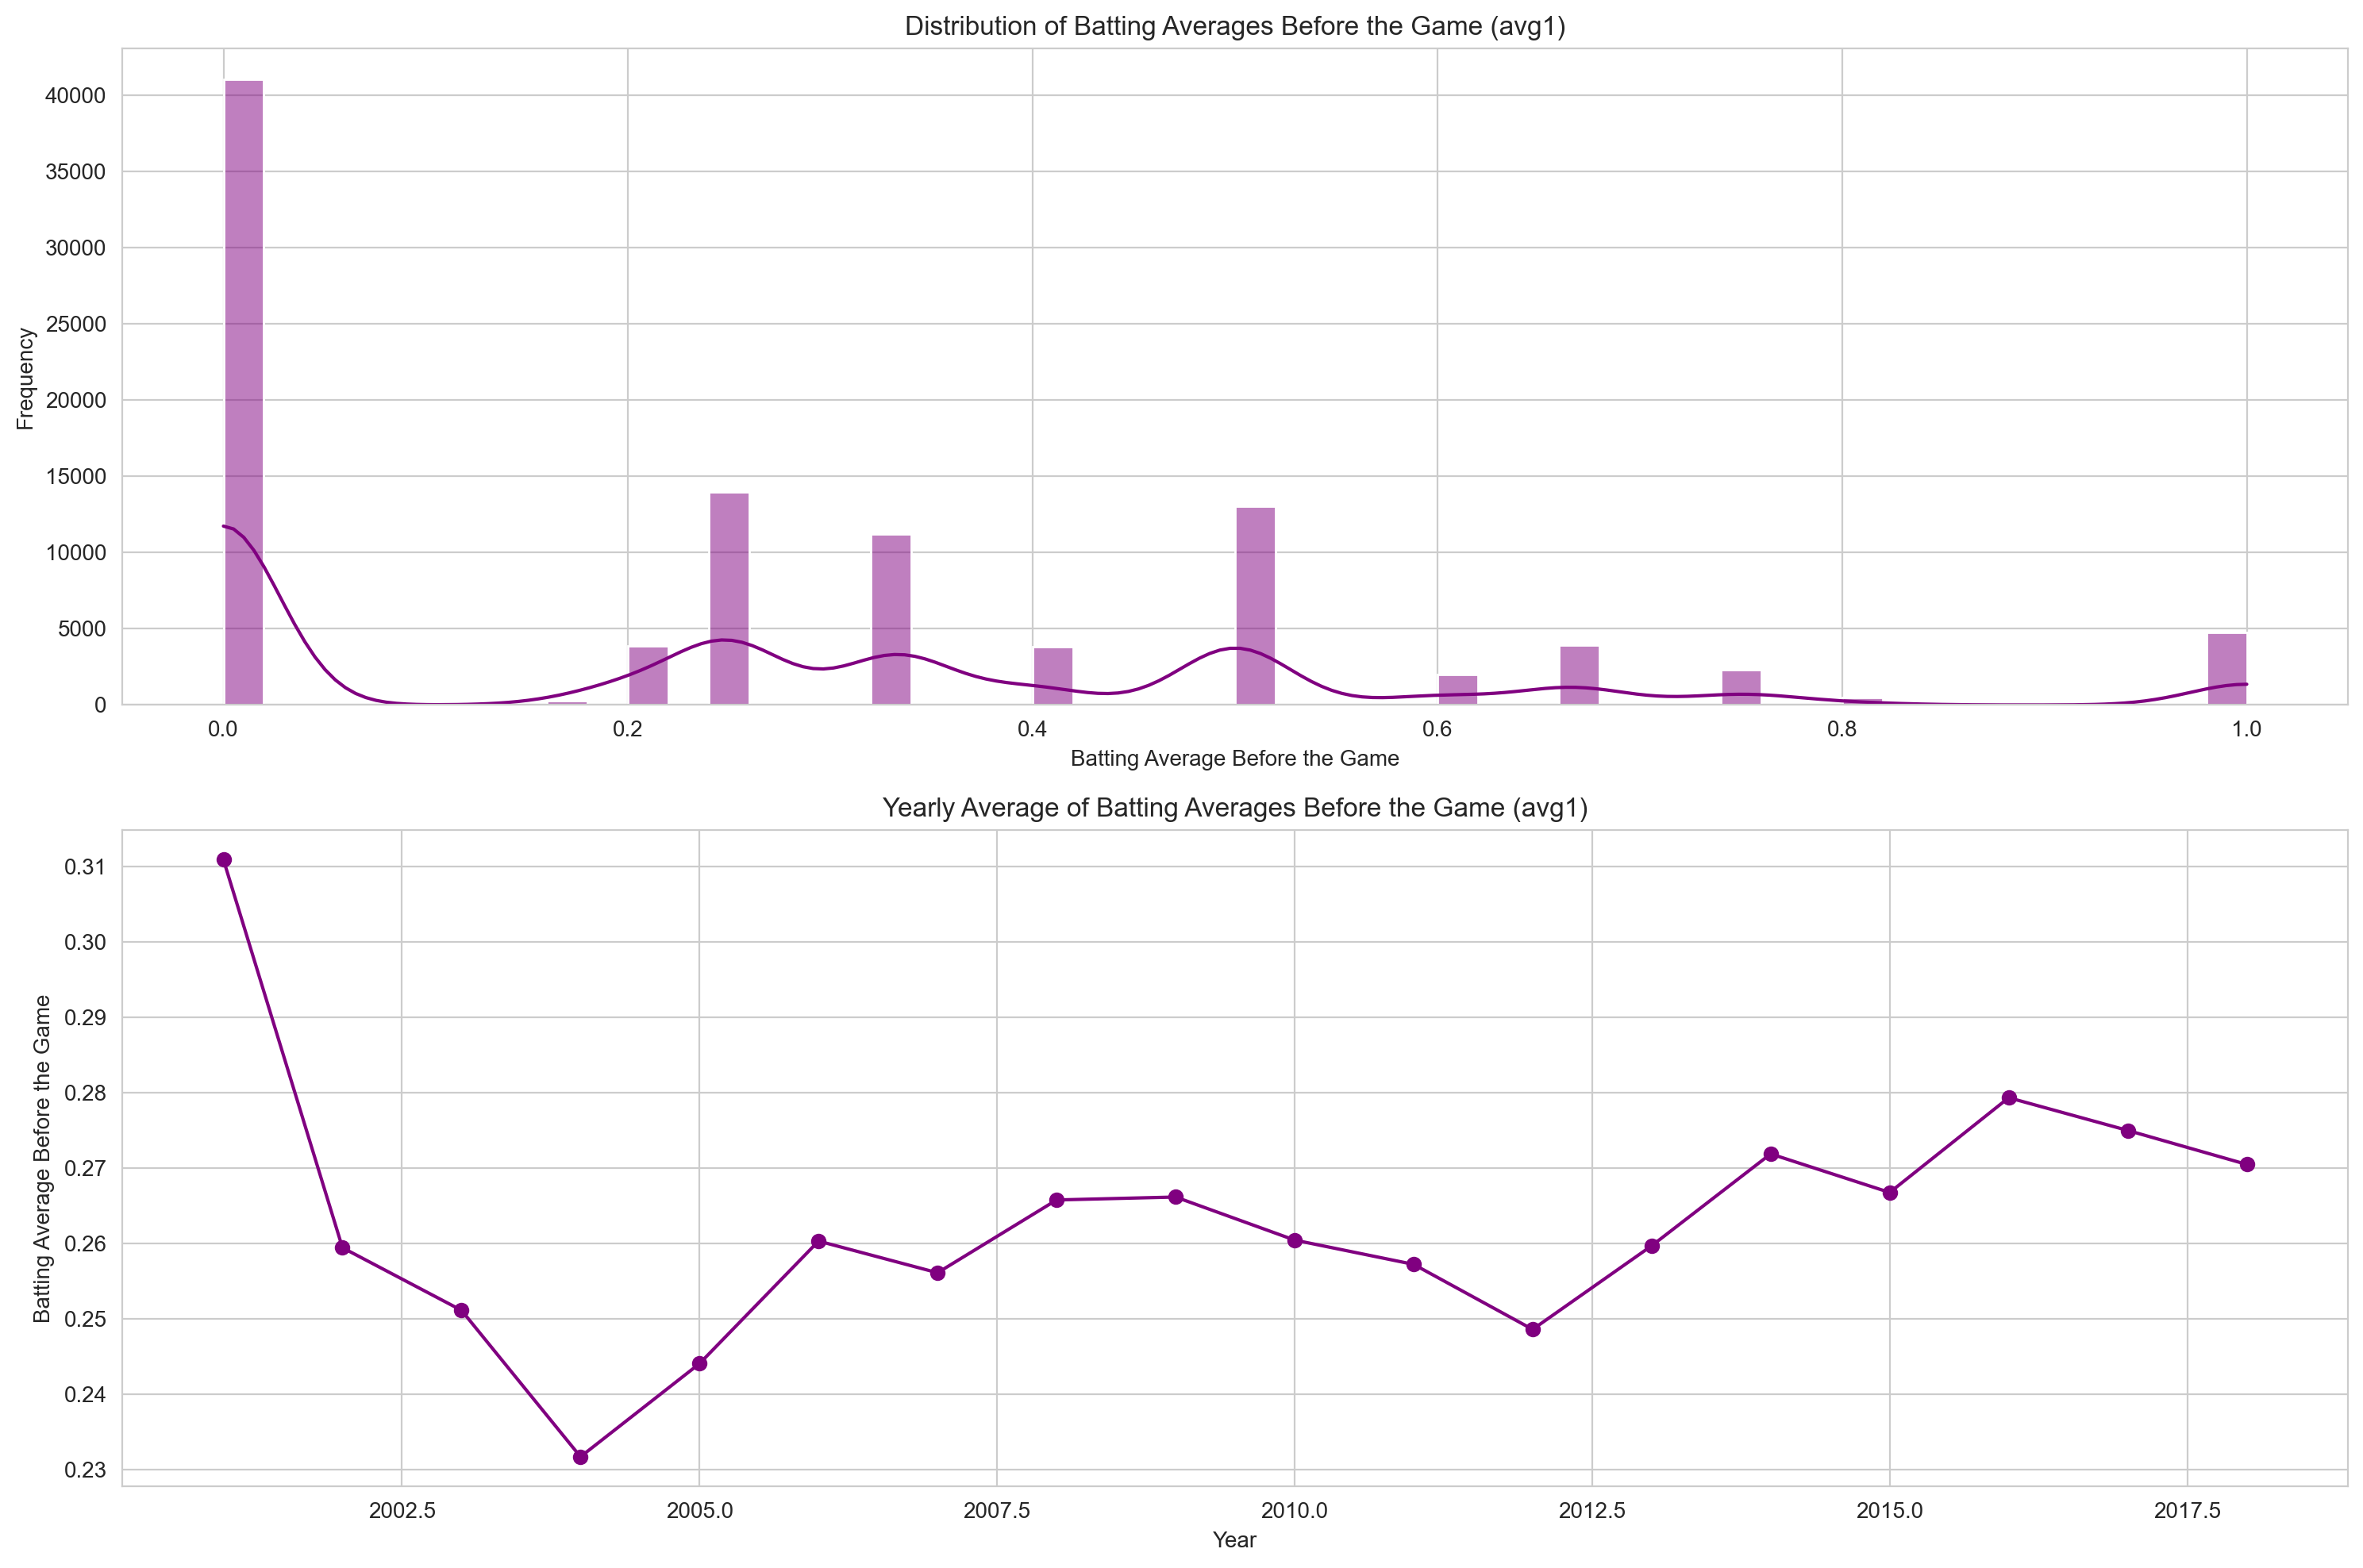

In [29]:
# 'date'와 'avg1'에 대한 EDA
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# 'avg1'의 분포 확인
sns.histplot(anal_batter['avg1'], bins=50, ax=axes[0], color='purple', kde=True)
axes[0].set_title('Distribution of Batting Averages Before the Game (avg1)')
axes[0].set_xlabel('Batting Average Before the Game')
axes[0].set_ylabel('Frequency')

# 연도별 'avg1'의 평균 변화 확인
yearly_avg1 = anal_batter.groupby('year')['avg1'].mean()
axes[1].plot(yearly_avg1.index, yearly_avg1, marker='o', color='purple')
axes[1].set_title('Yearly Average of Batting Averages Before the Game (avg1)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Batting Average Before the Game')
axes[1].grid(True)

plt.tight_layout()
plt.show()

1. 'avg' 분포
- 대부분이 0.2~0.4 사이에 분포
- 0.3을 중심으로 정규분포 형태와 비슷하게 분포하고 있음
2. 연도 별 'avg1'의 평균 변화
- 전체적으로 연도 별 타율의 큰 변동성은 없으며, 대략 0.26~0.27 사이에서 일정하게 유지

# 정규시즌 타자 데이터 통계분석

In [8]:
# 정규시즌 타자 csv파일
batter_df = pd.read_csv('Regular_Season_Batter.csv')

batter_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


- 컬럼 정보
    - batter_id: 타자의 고유 ID
    - batter_name: 타자의 이름
    - year: 연도
    - team: 팀 이름
    - avg: 타율
    - G: 경기수
    - AB: 타석
    - R: 득점
    - H: 안타
    - 2B: 2루타
    - SLG: 장타율
    - OBP: 출루율
    - E: 실책
    - height/weight: 키와 몸무게
    - year_born: 출생년월일
    - position: 포지션
    - career: 경력
    - starting_salary: 시작 연봉
    - OPS: OPS 지표 (출루율 + 장타율)

In [32]:
# 기본 info 
basic_stats = batter_df.describe()

basic_stats

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


- 경기수(G): 대부분의 선수들이 72경기 정도를 치른 것으로 보이며, 평균적으로 73경기 정도에 출전. 가장 많은 경기에 출전한 선수는 전경기인 144경기에 출전
- 타율(avg): 평균 타율은 약 0.238로, 중간값은 0.255. 최대 타율은 1.000인데, 이는 매우 적은 타석에 들어갔을 가능성이 있음
- 안타(H): 평균적으로 선수들은 약 56개의 안타를 치는 것으로 나타남. 최대 안타 수는 201개
- 홈런(HR): 평균적으로 선수들은 약 5.5개의 홈런을 치는 것으로 나타났으며, 홈런을 가장 많이 친 선수는 53개의 홈런을 쳤음
- OPS: OPS는 출루율(OBP)과 장타율(SLG)의 합으로, 타자의 능력을 종합적으로 나타내는 지표. 평균 OPS는 약 0.650

### 결측치 및 각 특성의 분포 시각화로 확인

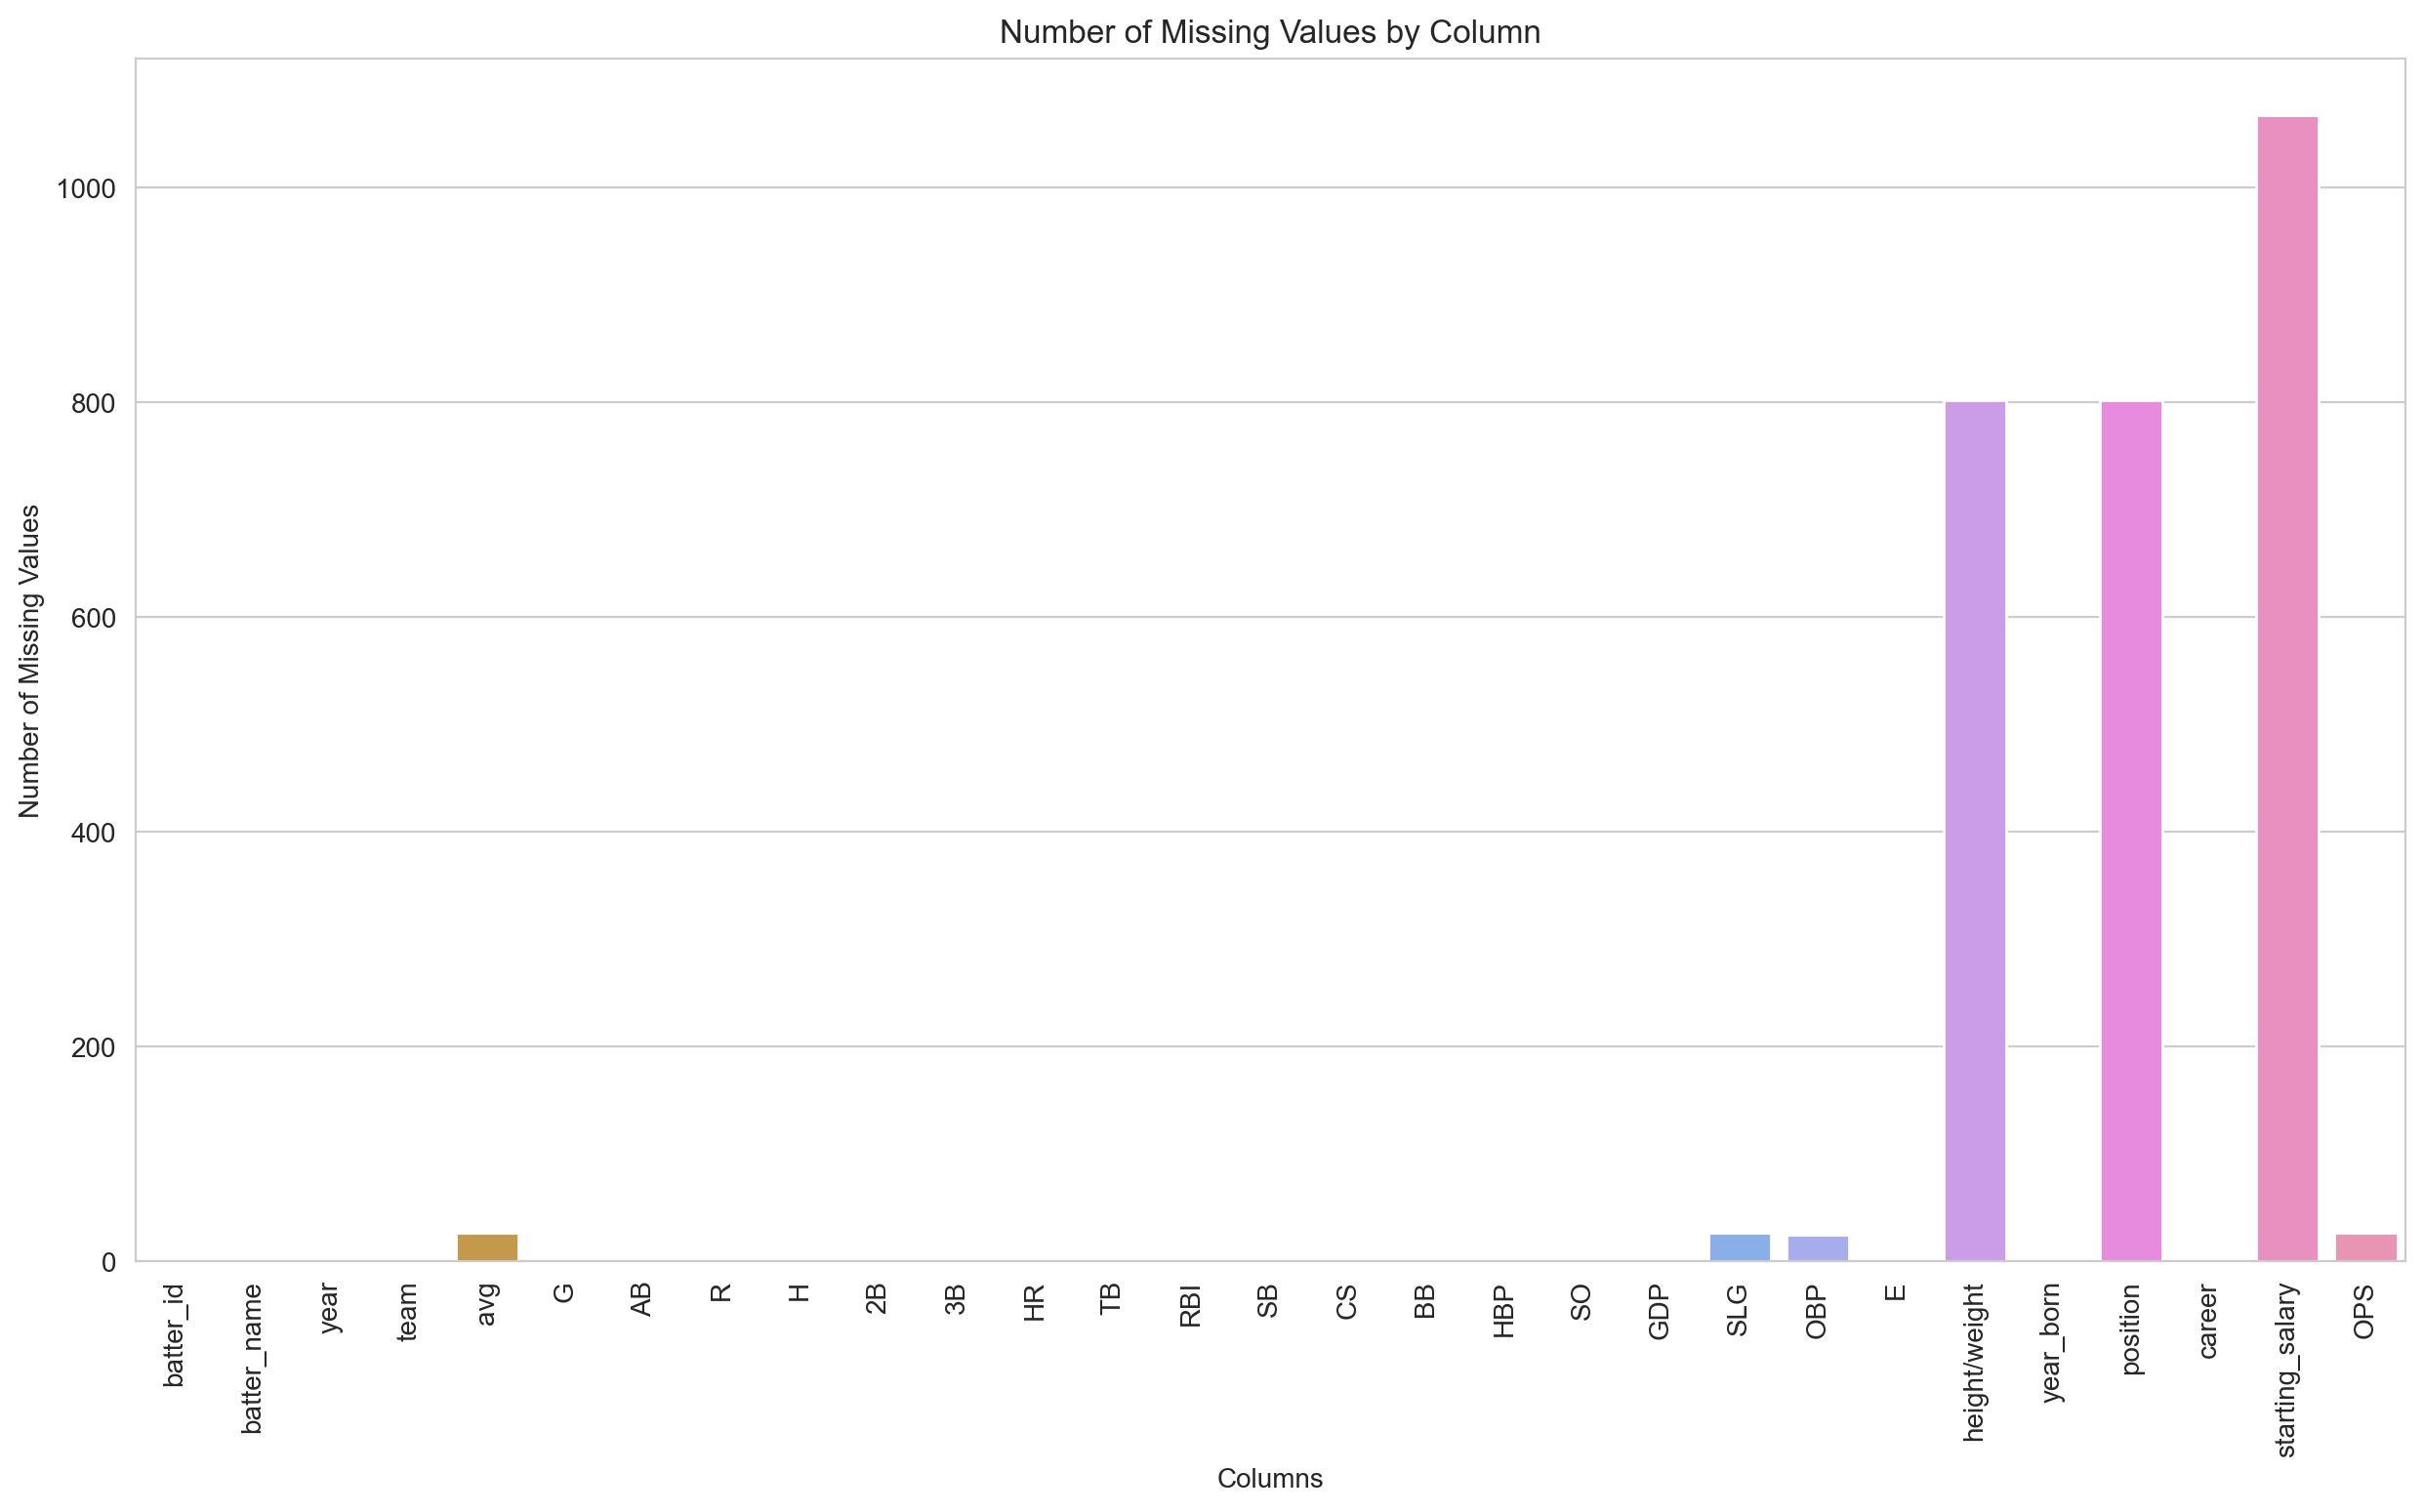

In [33]:
# 결측치 확인
missing_values = batter_df.isnull().sum()

# 결측치 그래프로 확인
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Number of Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

- 'avg', 'SLG', 'OBP', 'OPS'에서는 소량의 결측치가 발견. 이는 아마도 해당 선수가 경기에 출전하지 않았거나, 타석에 서지 않아 해당 통계치가 계산되지 않았을 가능성이 있음
- 'starting_salary'에서는 상당히 많은 결측치가 있음. 이는 해당 선수의 초봉 정보가 기록되지 않았을 가능성이 높아보임

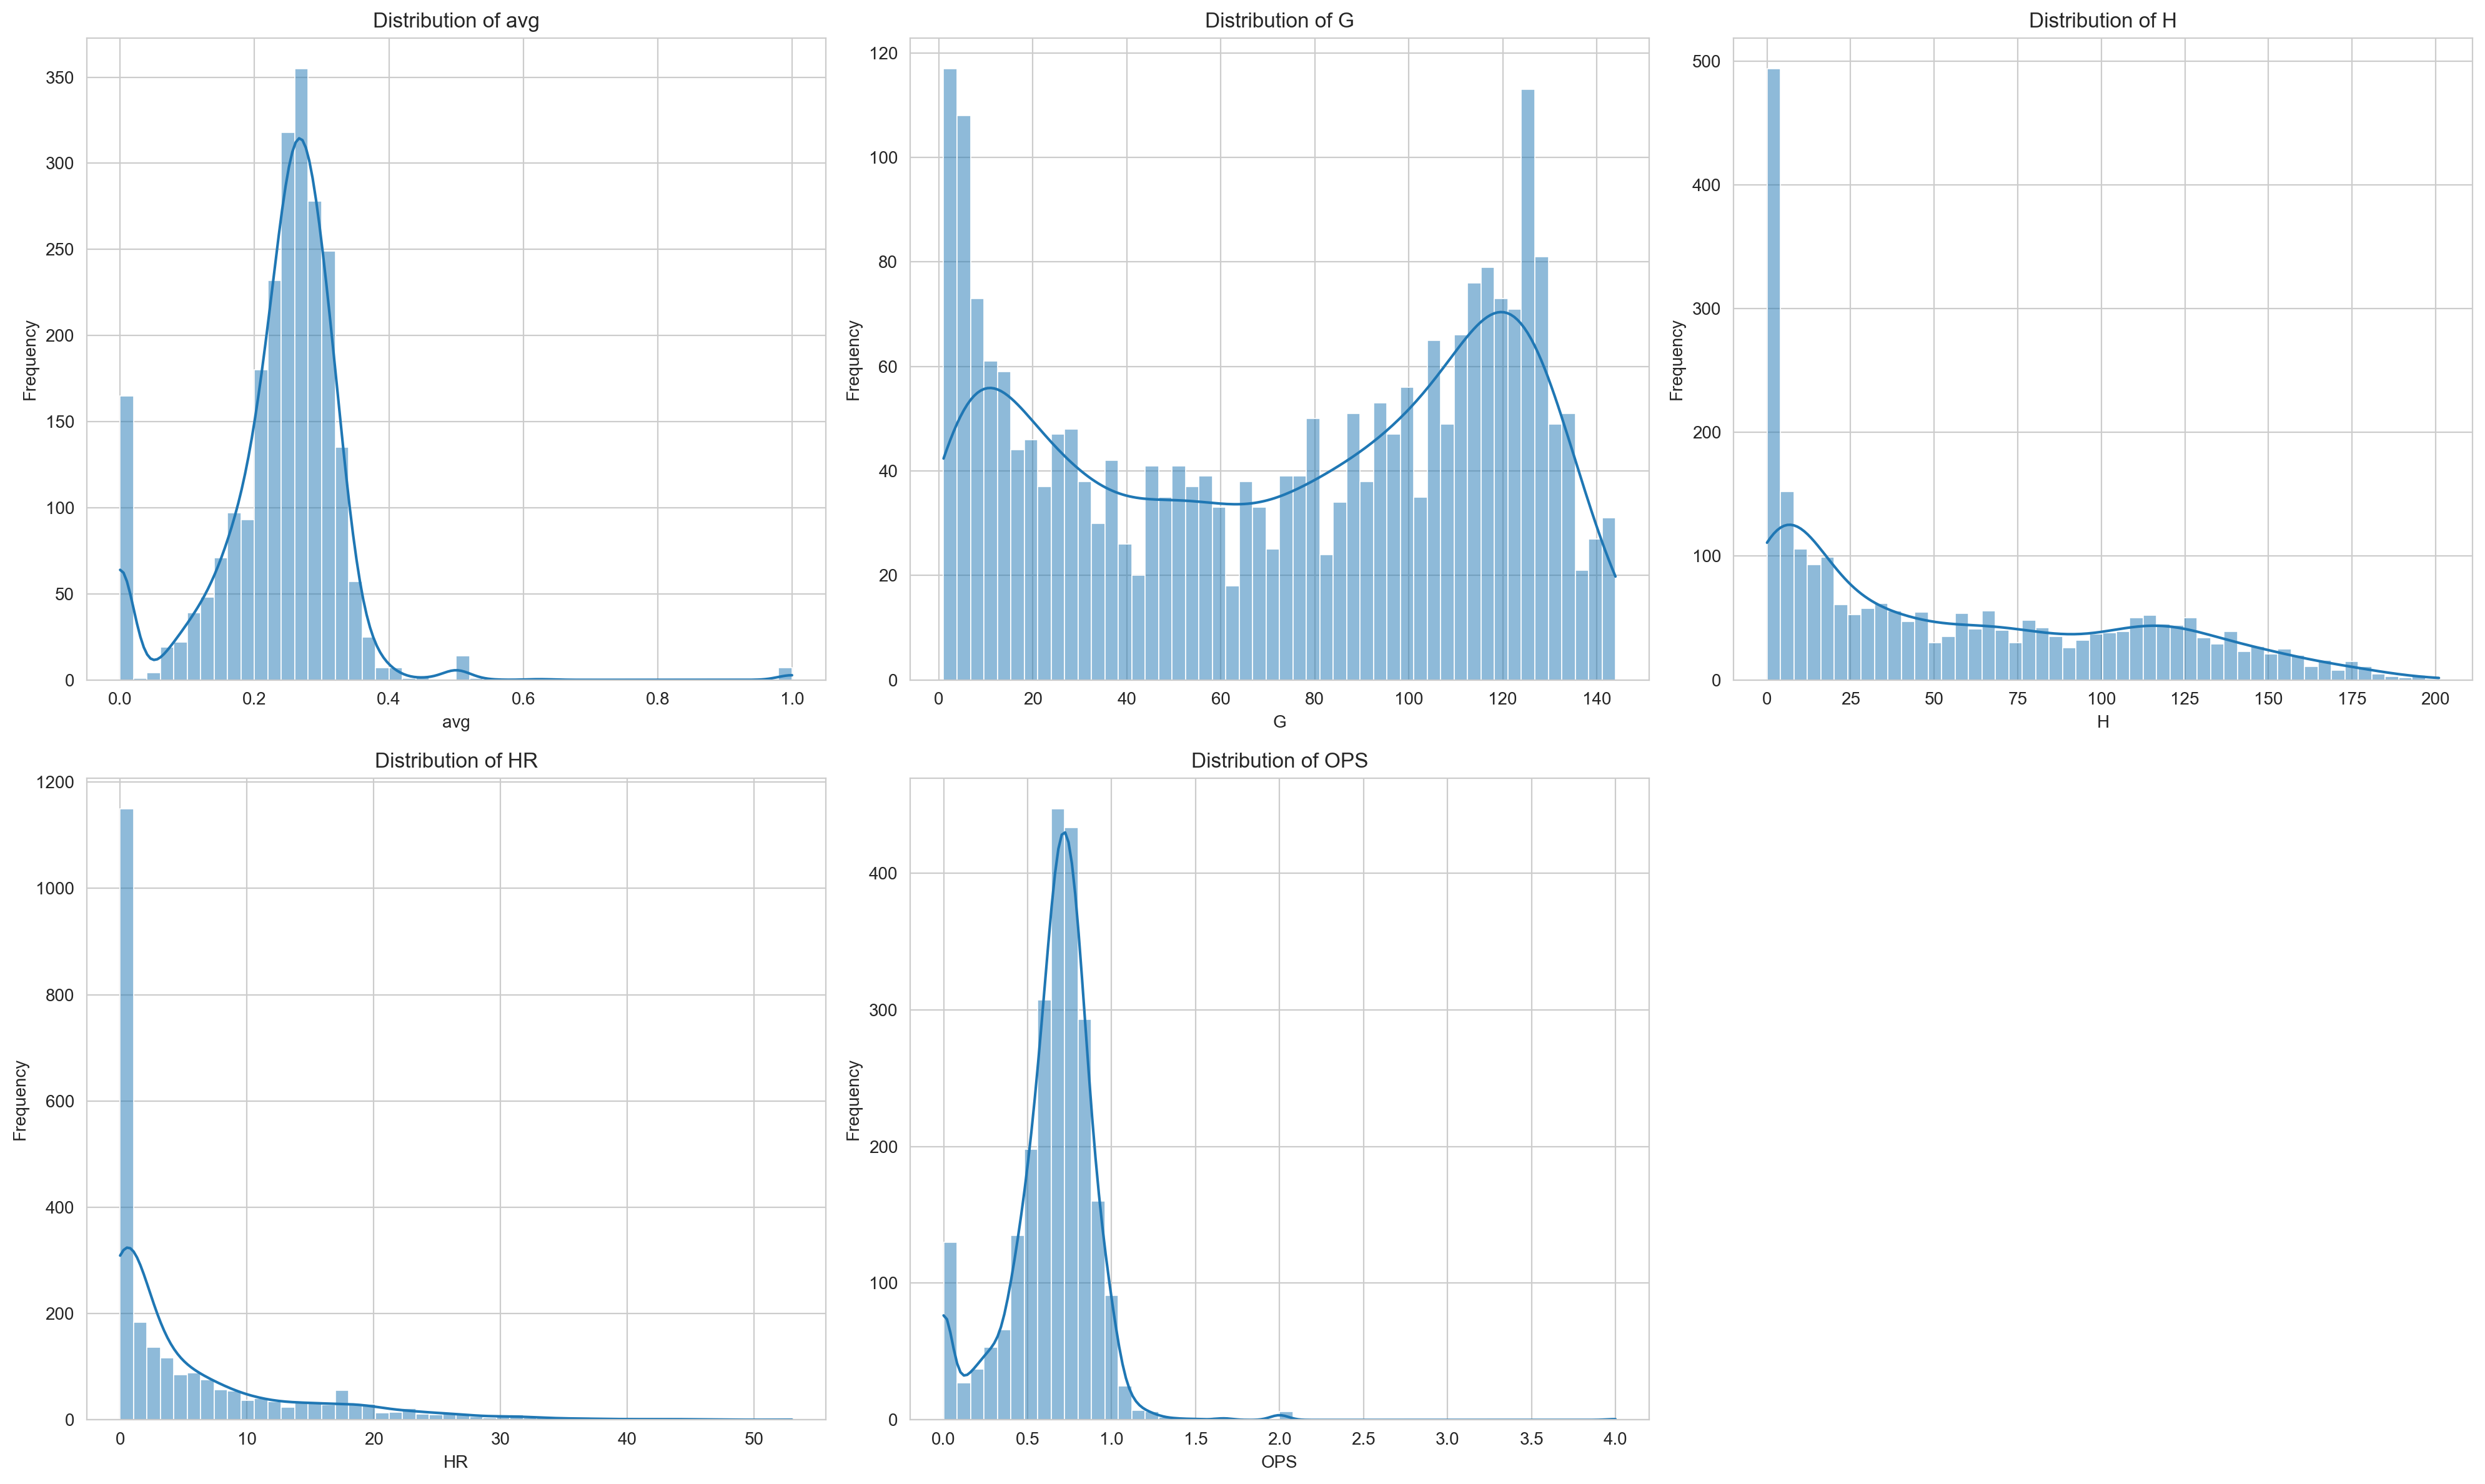

In [34]:
# 타율, 경기수, 안타, 홈런, OPS에 대한 분포 확인 위해 해당 특성 변수에 저장
columns_to_visualize = ['avg', 'G', 'H', 'HR', 'OPS']

# 시각화
plt.figure(figsize=(20, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(batter_df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- 타율(avg) : 대부분의 선수들의 타율은 0.2 ~ 0.3 사이에 집중. 타율이 1.0인 선수들도 있으며, 이는 아마도 매우 적은 타석에서의 성적일 가능성이 있음
- 경기수(G): 경기수 분포는 다양하게 나타나며, 0 ~ 20 경기 사이에 많은 선수들이 위치. 또한 120경기에서 140경기를 출전한 선수들도 많은 것을 볼 수 있음
- 안타(H): 안타의 수는 대부분 0 ~ 50 사이에 집중
- 홈런(HR): 대부분의 선수들이 10개 미만의 홈런을 치는 것으로 보임
- OPS: OPS 분포는 대부분 0.5 ~ 1.0 사이에 위치. OPS가 1을 초과하는 선수들도 있으나, 이들은 상대적으로 적은 비중

### 연도 별 선수들의 평균 통계치의 변화

C:\Users\GM220808\AppData\Local\Temp\ipykernel_11220\235670483.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = batter_df.groupby(['year']).mean()


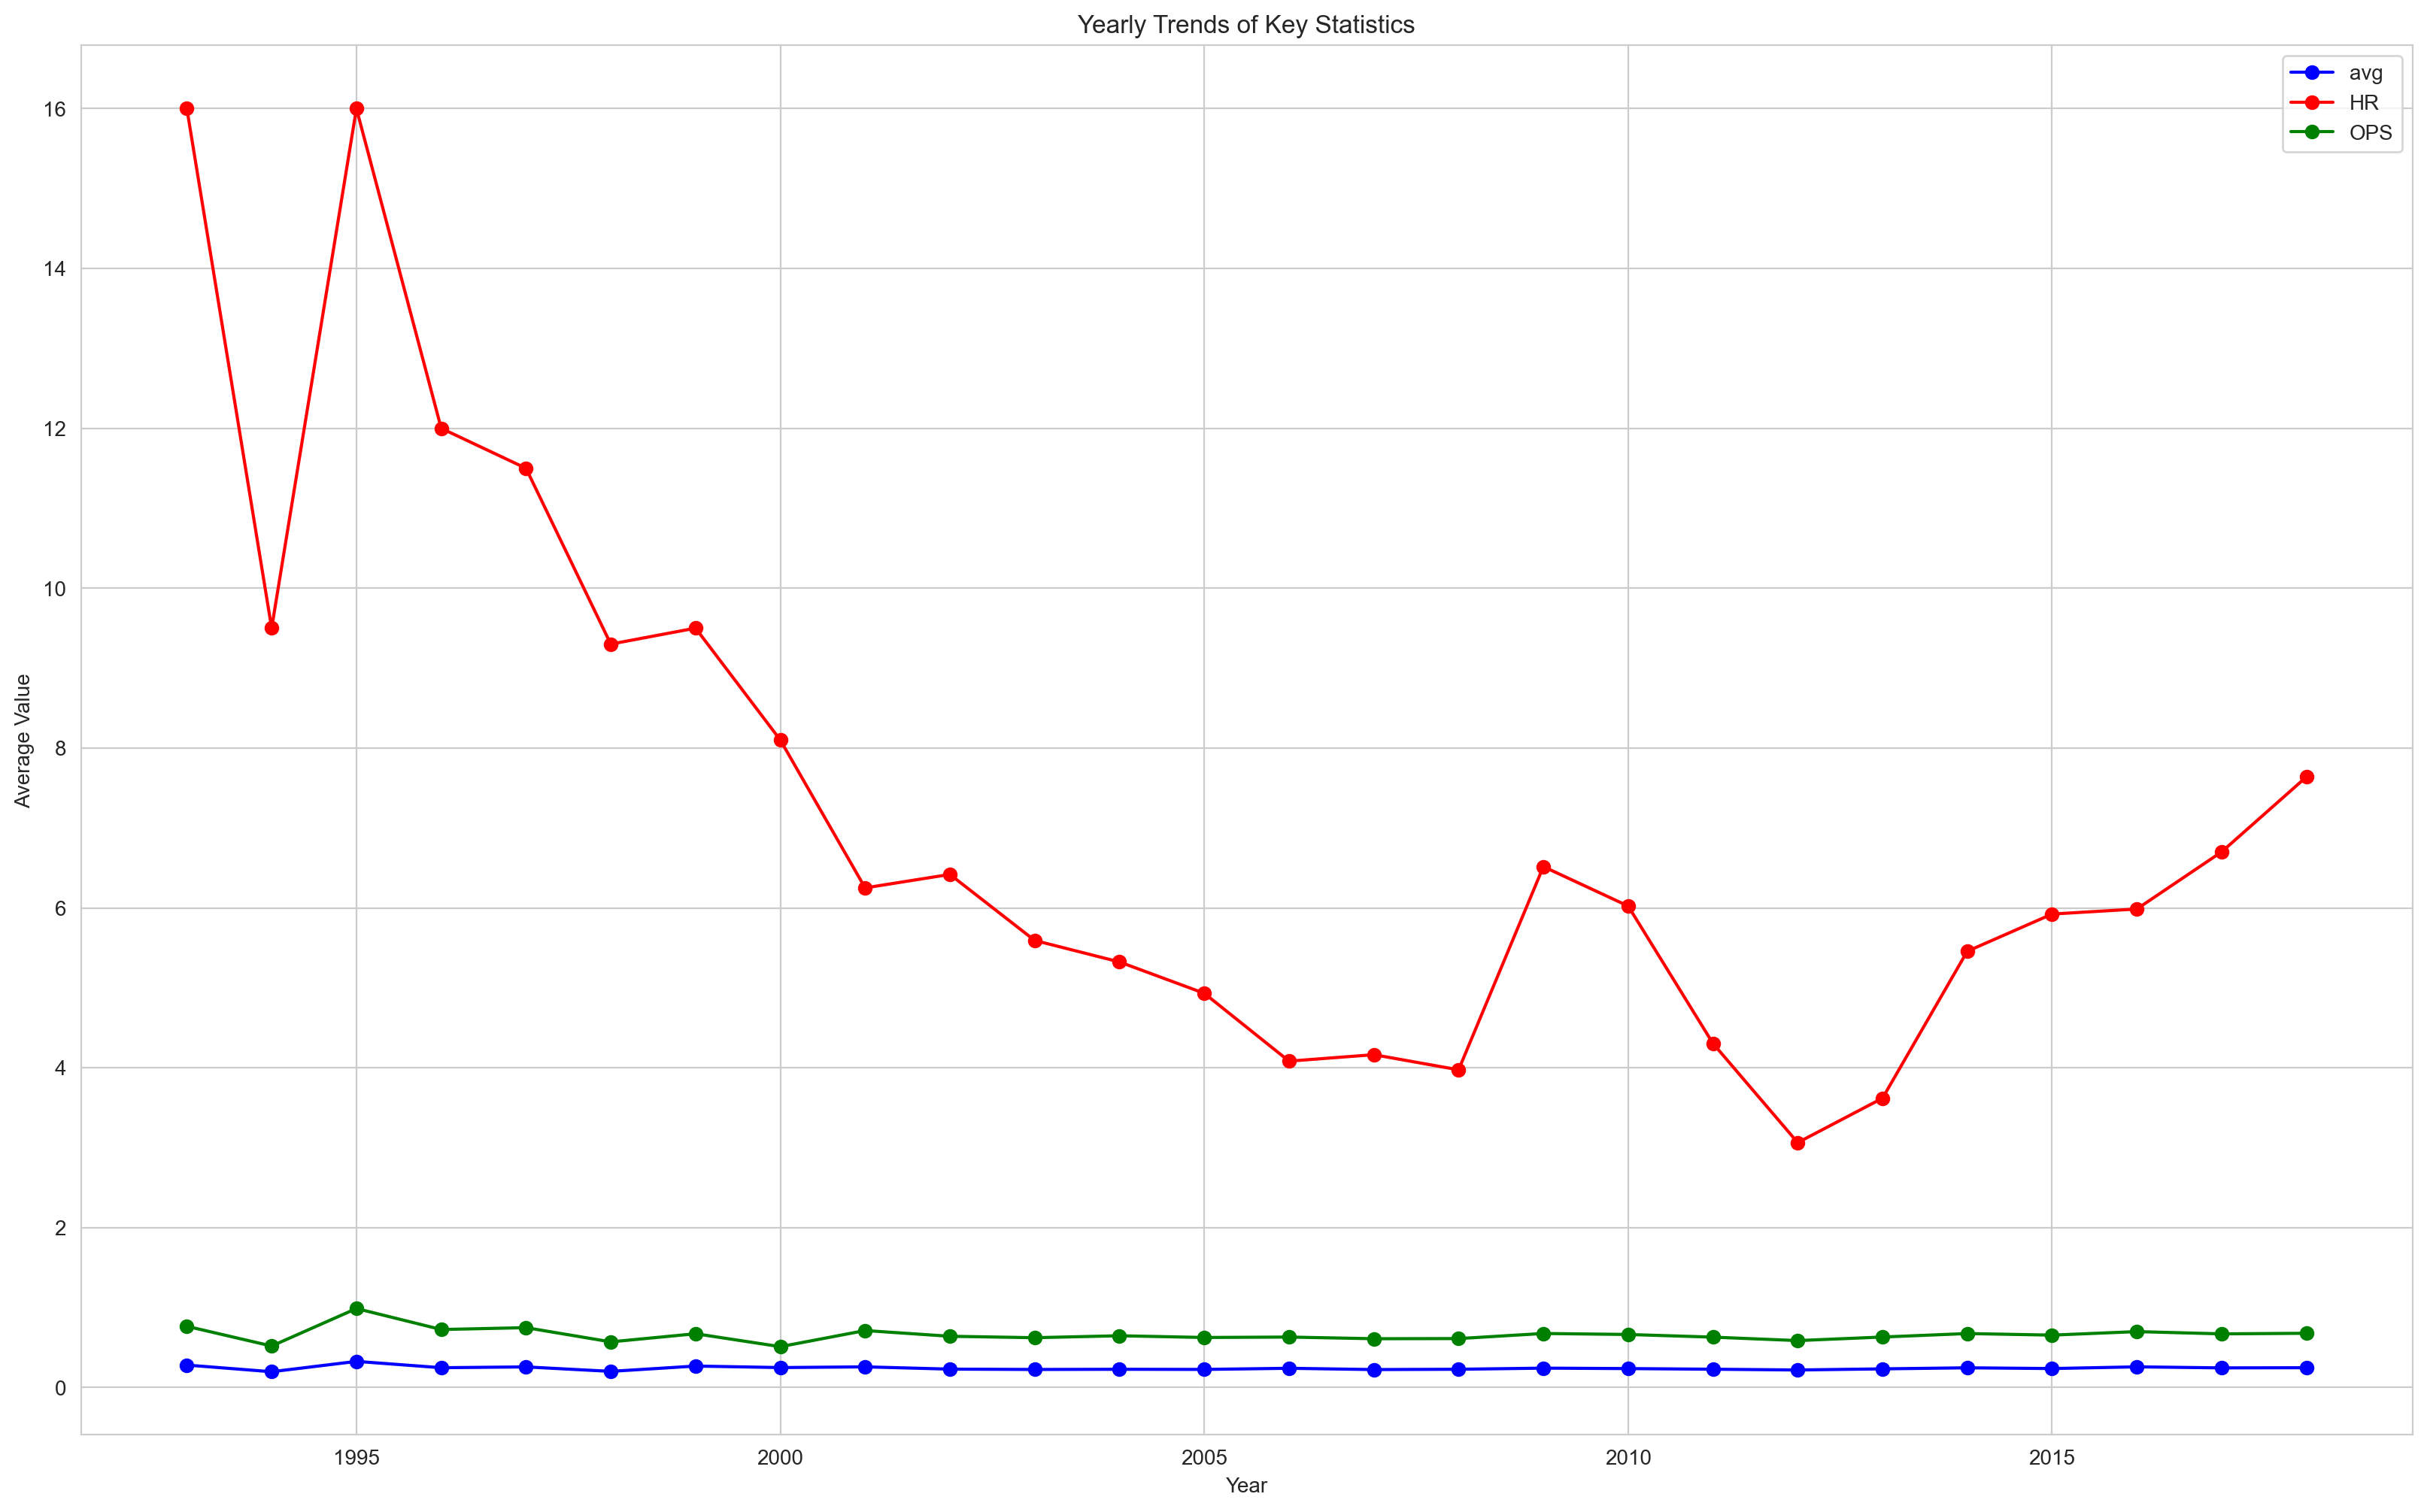

In [36]:
# 연도별로 그룹화하고 각 통계량에 대한 평균을 가져옴
yearly_avg = batter_df.groupby('year').mean()

# 선수들의 다년 간 추세를 시각화
plt.figure(figsize=(20, 12))

columns_and_colors = [('avg', 'blue'), ('HR', 'red'), ('OPS', 'green')]

for column, color in columns_and_colors:
    plt.plot(yearly_avg.index, yearly_avg[column], marker='o', label=column, color=color)

plt.title('Yearly Trends of Key Statistics')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

1. 타율(avg): 전체적으로 타율은 약간의 변동성을 보이고 있으며, 2000년 이후로는 상대적으로 안정적인 추세를 보이고 있음
2. 홈런(HR): 홈런의 수는 1993년부터 2000년까지 상승한 후, 이후로는 점진적으로 하락. 2010년 이후로는 다시 상승하는 추세를 보이고 있음
3. OPS: OPS는 1993년부터 2000년까지 상승하였으며, 이후로는 상대적으로 안정적인 추세를 보이고 있음. 이는 공인구의 변화, 스트라이크 존의 변화 등의 다양한 요인으로 인한 결과로 예상됨
     
     -> 해당 지표들은 리그의 전반적인 경향, 경기장의 변화, 규칙의 변화, 훈련 방법의 변화 등 다양한 요인에 영향을 받을 가능성이 있음

### 팀별 선수들의 통계치 비교

C:\Users\GM220808\AppData\Local\Temp\ipykernel_11220\4213638969.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_avg = batter_df.groupby('team').mean()


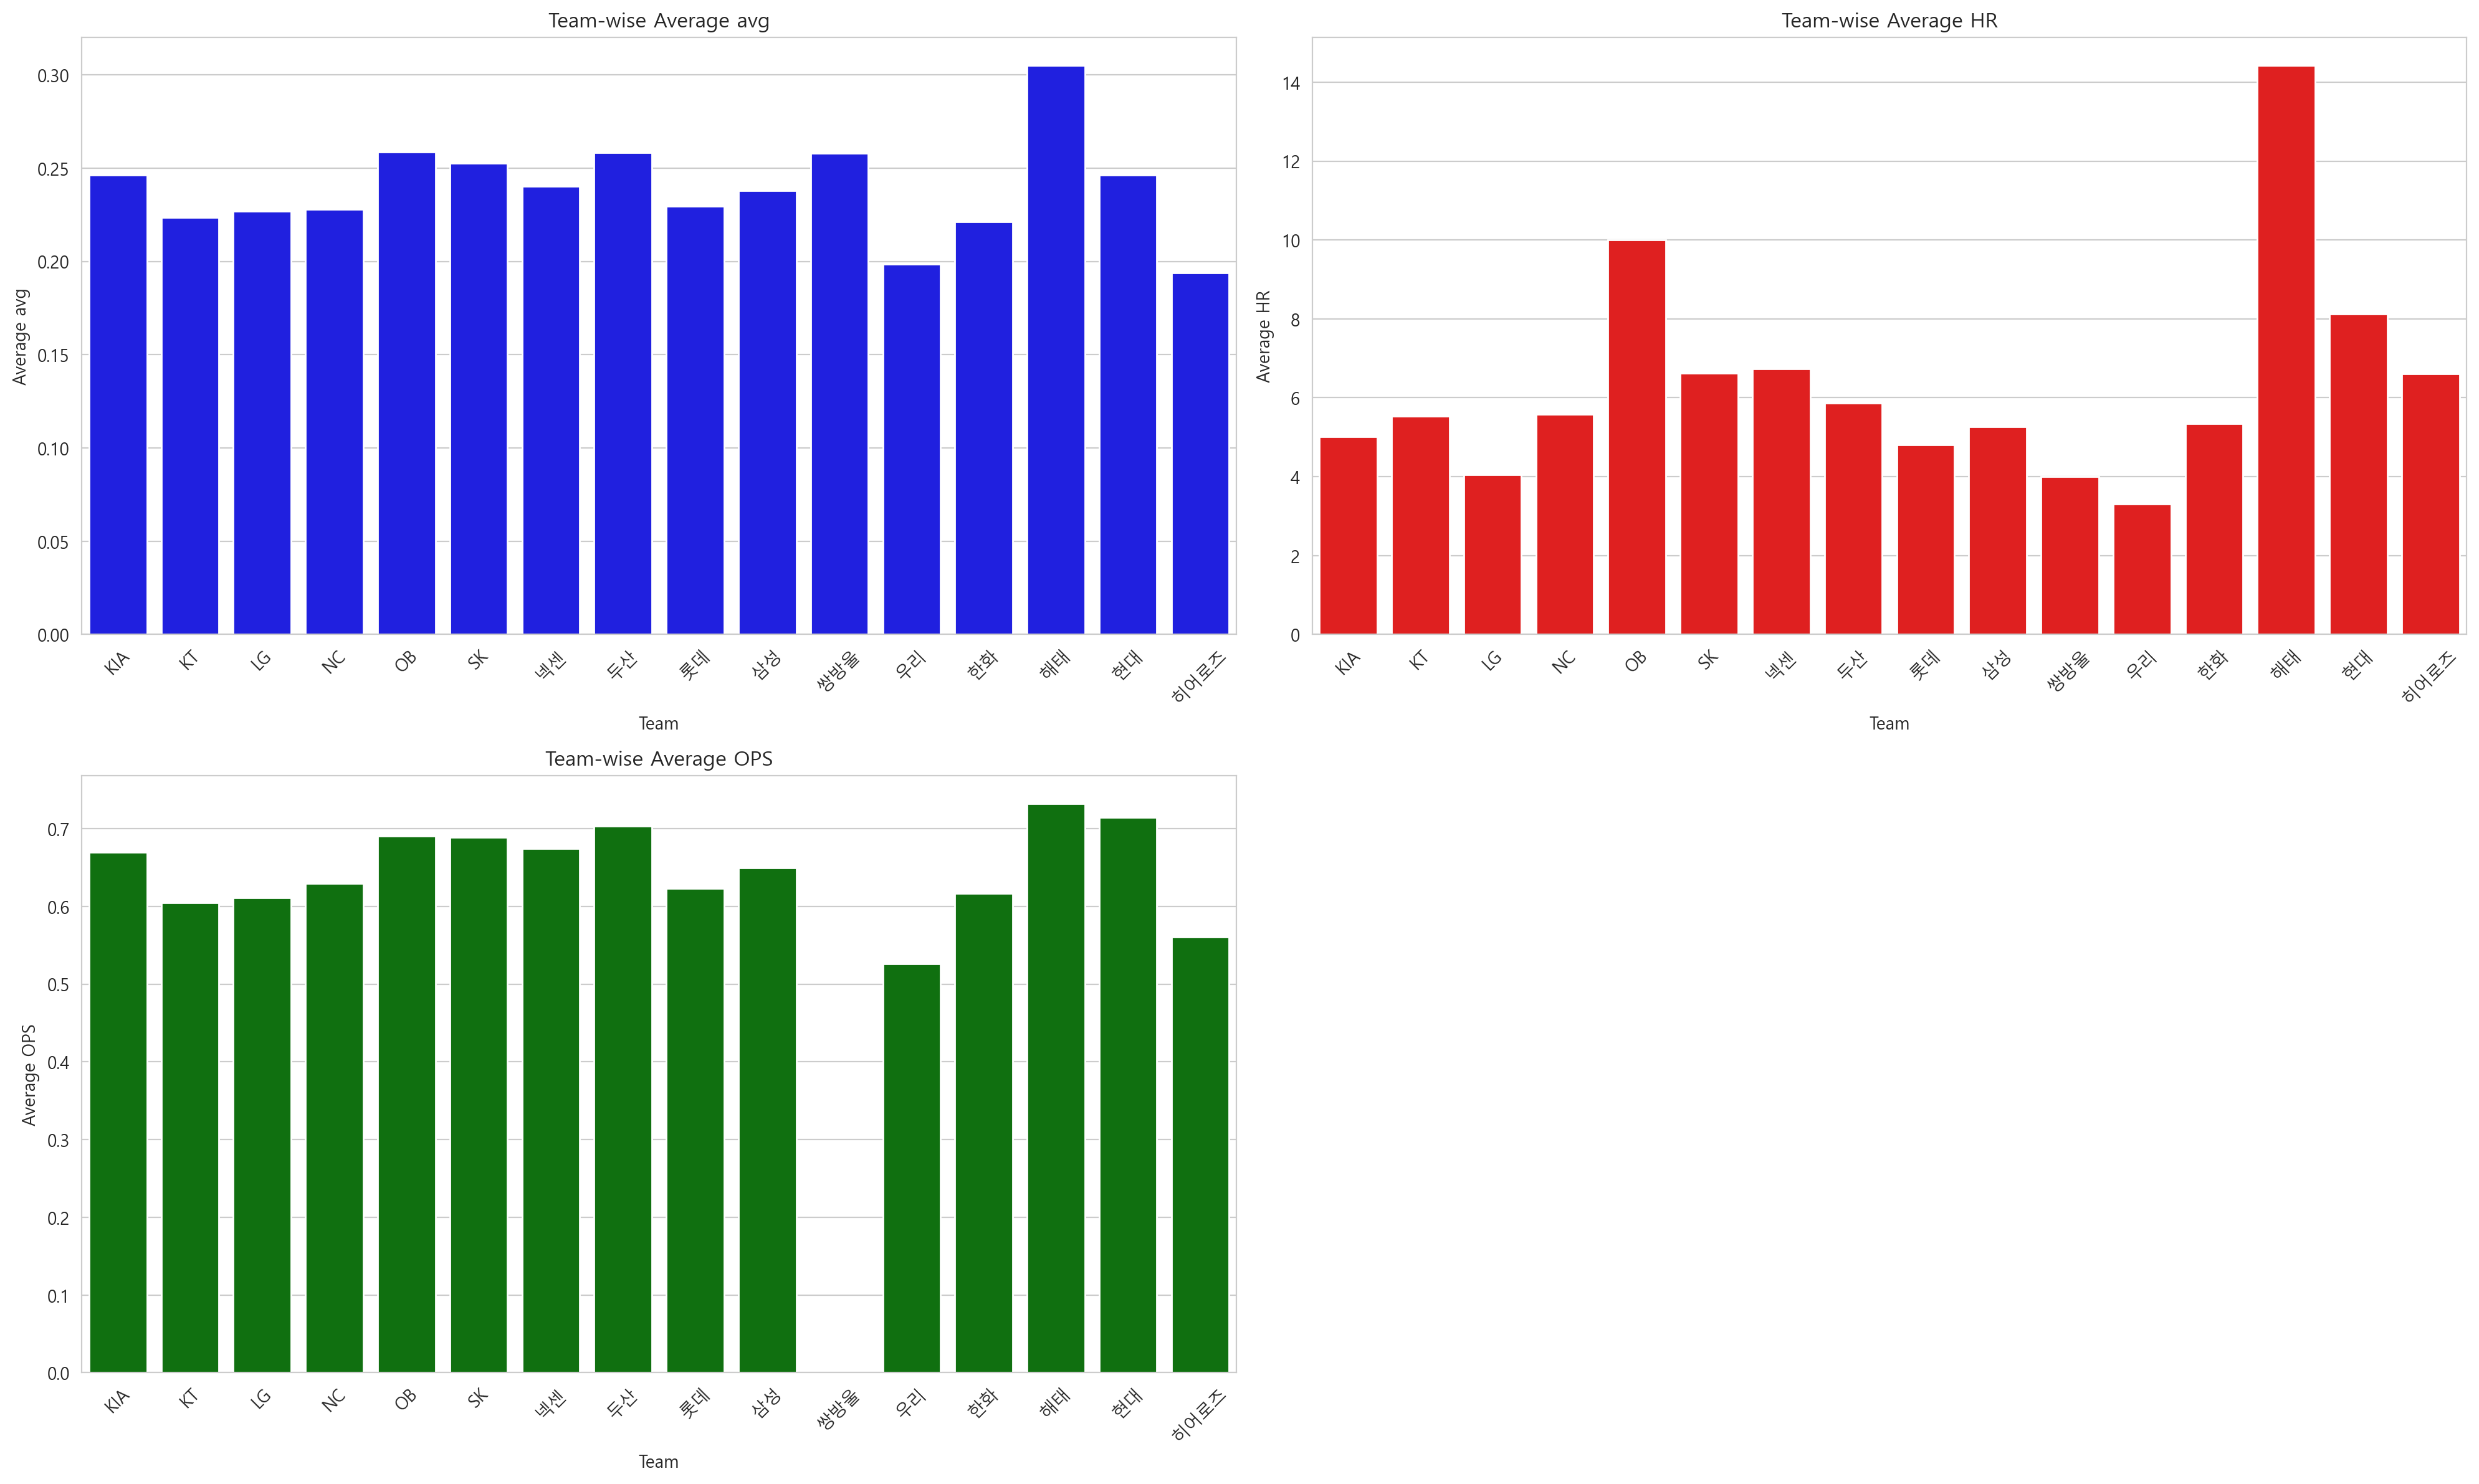

In [41]:
# 팀별 그룹화
team_avg = batter_df.groupby('team').mean()

# 팀 단위 통계량 표시
plt.figure(figsize=(20, 12))

columns_and_colors = [('avg', 'blue'), ('HR', 'red'), ('OPS', 'green')]

for i, (column, color) in enumerate(columns_and_colors, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=team_avg.index, y=team_avg[column], color=color)
    plt.title(f'Team-wise Average {column}')
    plt.xlabel('Team')
    plt.ylabel(f'Average {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. 타율(avg): 대부분의 팀들의 타율은 비슷한 수준. 그러나 일부 팀들은 다른 팀들에 비해 높거나(해태-홈런, 타율 부문) 낮은 타율(LG)을 보이고 있다
2. 홈런(HR): 팀별 홈런 수는 다양하게 분포. 일부 팀들은 홈런을 많이 치는 경향이 있으며, 일부 팀들은 홈런을 적게 치는 경향이 있음
3. OPS: OPS 역시 팀별로 다양한 값을 보이고 있음

- 홈런을 많이 치는 팀은 장타 위주의 전략을 취하고 있을 가능성이 있고(반대로 출루율과 세밀한 전략, 즉 도루, 번트 등의 횟수도 한번 확인해보아야할 듯), 반대로 홈런을 적게 치는 팀은 연속타를 통한 득점 전략 등을 선호할 수 있음

### 정규시즌 타자 데이터 상관분석

- OPS는 출루율(OBP)와 장타율(SLG)의 합으로 계산되므로, 이 두 변수와 관련된 다른 변수들의 상관관계를 분석

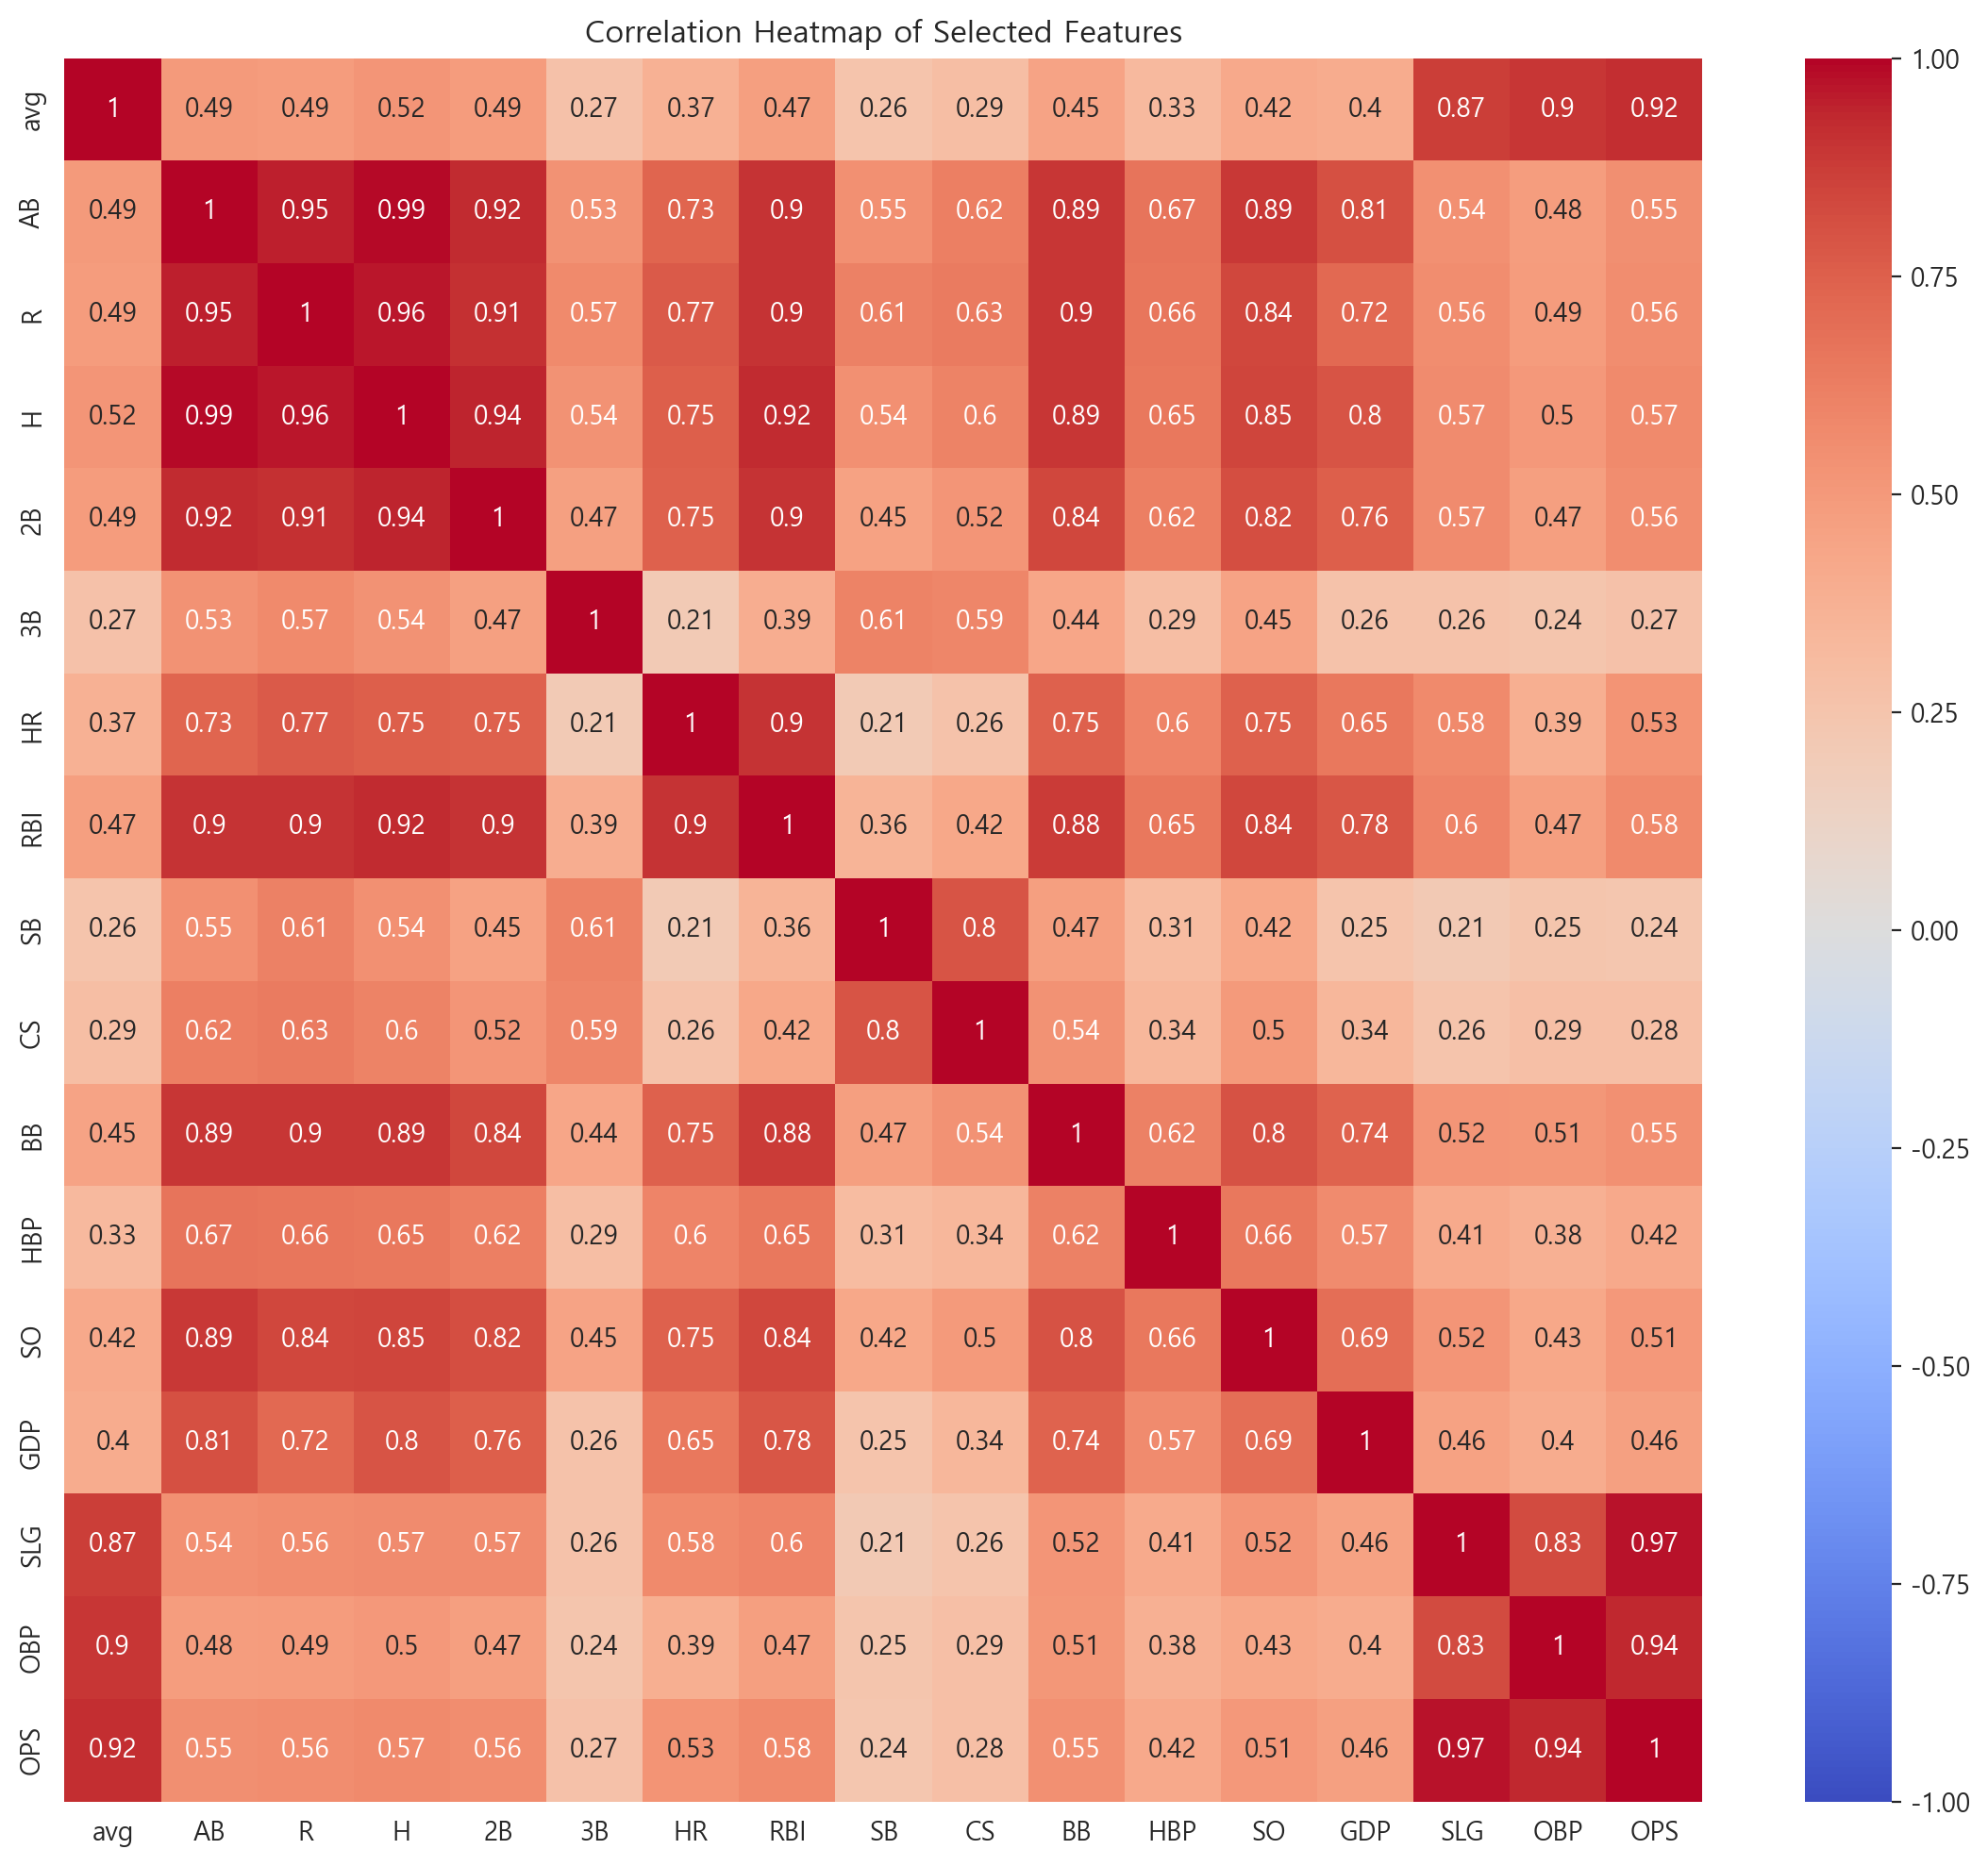

In [42]:
# OBP와 SLG와 관련된 변수들 선택
selected_columns = ['avg', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'OPS']
correlation_df = batter_df[selected_columns].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

1. OPS는 avg, R, H, 2B, 3B, HR, RBI, BB, HBP, SLG, 그리고 OBP와 강한 양의 상관 관계. OPS를 구성하는 데 중요한 역할을 하는 것
2. OPS는 SO와 약한 음의 상관 관계를 보이며, CS와 GDP와는 상관 관계가 크지 않음
3. SLG와 OBP는 OPS와 매우 강한 양의 상관 관계를 보임. 이는 OPS가 SLG와 OBP의 합으로 계산되기 때문

### OPS예측을 위해 기존 변수들 활용하여 파생변수 생성

1. 타석당 통계치: 특정 통계치를 타석 수(AB)로 나눠 타석당 평균 값을 계산
- 타석당 득점 (R/AB)
- 타석당 안타 (H/AB)
- 타석당 홈런 (HR/AB)
2. 장타력: 장타력을 나타내는 지표로, 홈런, 2루타, 3루타 등을 활용해 계산
- HR + 2B + 3B: 장타 수의 합
- (HR + 2B + 3B) / AB: 타석당 장타 수
3. 출루 기여도: 타자가 출루하는 데 기여하는 요소들을 종합한 지표
- BB + HBP: 볼넷과 사구의 합
- (BB + HBP) / AB: 타석당 볼넷 및 사구
4. 도루 성공률: 도루 시도 횟수 대비 성공 횟수
- SB / (SB + CS): 도루 성공률
5. 삼진률: 타석당 삼진을 얼마나 당하는지
- SO / AB: 타석당 삼진 수
6. 병살타률: 타석당 병살타를 얼마나 치는지
- GDP / AB: 타석당 병살타 수

위 파생변수들 중 OPS예측에 가장 큰 영향을 미칠 것이라 예상되는 3개 변수 선택
- 타석당 안타 (H/AB)
- 도루 성공률 (SB / (SB + CS))
- 타석당 삼진 (SO / AB)

In [44]:
# 파생 변수 생성
batter_df['Hits_per_AB'] = batter_df['H'] / batter_df['AB']
batter_df['Steal_Success_Rate'] = batter_df['SB'] / (batter_df['SB'] + batter_df['CS'])
batter_df['Strikeouts_per_AB'] = batter_df['SO'] / batter_df['AB']

# 파생 변수와 OPS의 상관 관계 계산
derived_features_corr = batter_df[['Hits_per_AB', 'Steal_Success_Rate', 'Strikeouts_per_AB', 'OPS']].corr()

# 상관 관계의 OPS 부분만 추출
ops_corr_with_derived_features = derived_features_corr['OPS'].drop('OPS')

ops_corr_with_derived_features

Hits_per_AB           0.919695
Steal_Success_Rate    0.013535
Strikeouts_per_AB    -0.422280
Name: OPS, dtype: float64

- 타석당 안타 (Hits_per_AB): 상관 계수는 약 0.92로, 매우 강한 양의 상관 관계
- 도루 성공률 (Steal_Success_Rate): 상관 계수는 약 0.01로, OPS와의 상관 관계가 거의 없음
- 타석당 삼진 (Strikeouts_per_AB): 상관 계수는 약 -0.42로, 중간 정도의 음의 상관 관계

### 정규시즌 타자 데이터의 상위 10% 선수들의 OPS항목 시계열 분석

- 분석 Process

1. 데이터 로딩 및 확인
2. 데이터 전처리: 결측값 및 이상치 처리, 필요한 데이터 선택
3. 상위 10% 타자의 선택
4. 시계열 분석을 위한 데이터 구조화
5. 시계열 분석
6. 결과 시각화

In [9]:
batter_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [22]:
batter_df.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [12]:
missing_values = batter_df[['year', 'OPS']].isnull().sum()
missing_values

year     0
OPS     26
dtype: int64

- 'OPS' 컬럼에 26개의 결측값 존재. 타석에 나서지 않았거나 장타율 또는 출루율 값이 존재하지 않아 발생하는 결측값으로 예상. 해당 행 제거

### 상위 10% 타자 선택

In [14]:
# 결측값 제거
data_cleaned = batter_df.dropna(subset=['OPS'])

# 상위 90% 선수들 
percentile_90 = data_cleaned['OPS'].quantile(0.9)

# 10% 선수 추출
top_10_percent_players = data_cleaned[data_cleaned['OPS'] > percentile_90]

top_10_percent_players.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,...,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,...,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,...,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,...,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
97,10,강정호,2014,넥센,0.356,117,418,103,149,36,...,8,0.739234,0.460922,9,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,1.200156


### 시계열 분석을 위한 데이터 구조화

In [16]:
# 각 연도 별로 상위 10% 선수들의 OPS 평균 계산
yearly_mean_ops = top_10_percent_players.groupby('year')['OPS'].mean().reset_index()
yearly_mean_ops

,year,OPS
0,1994,1.036198
1,1995,0.987261
2,1996,0.962361
3,1997,1.037059
4,1998,0.920138
5,1999,1.020225
6,2000,0.991927
7,2001,1.007129
8,2002,1.017302
9,2003,0.954748


### 시계열 분석 및 결과 시각화

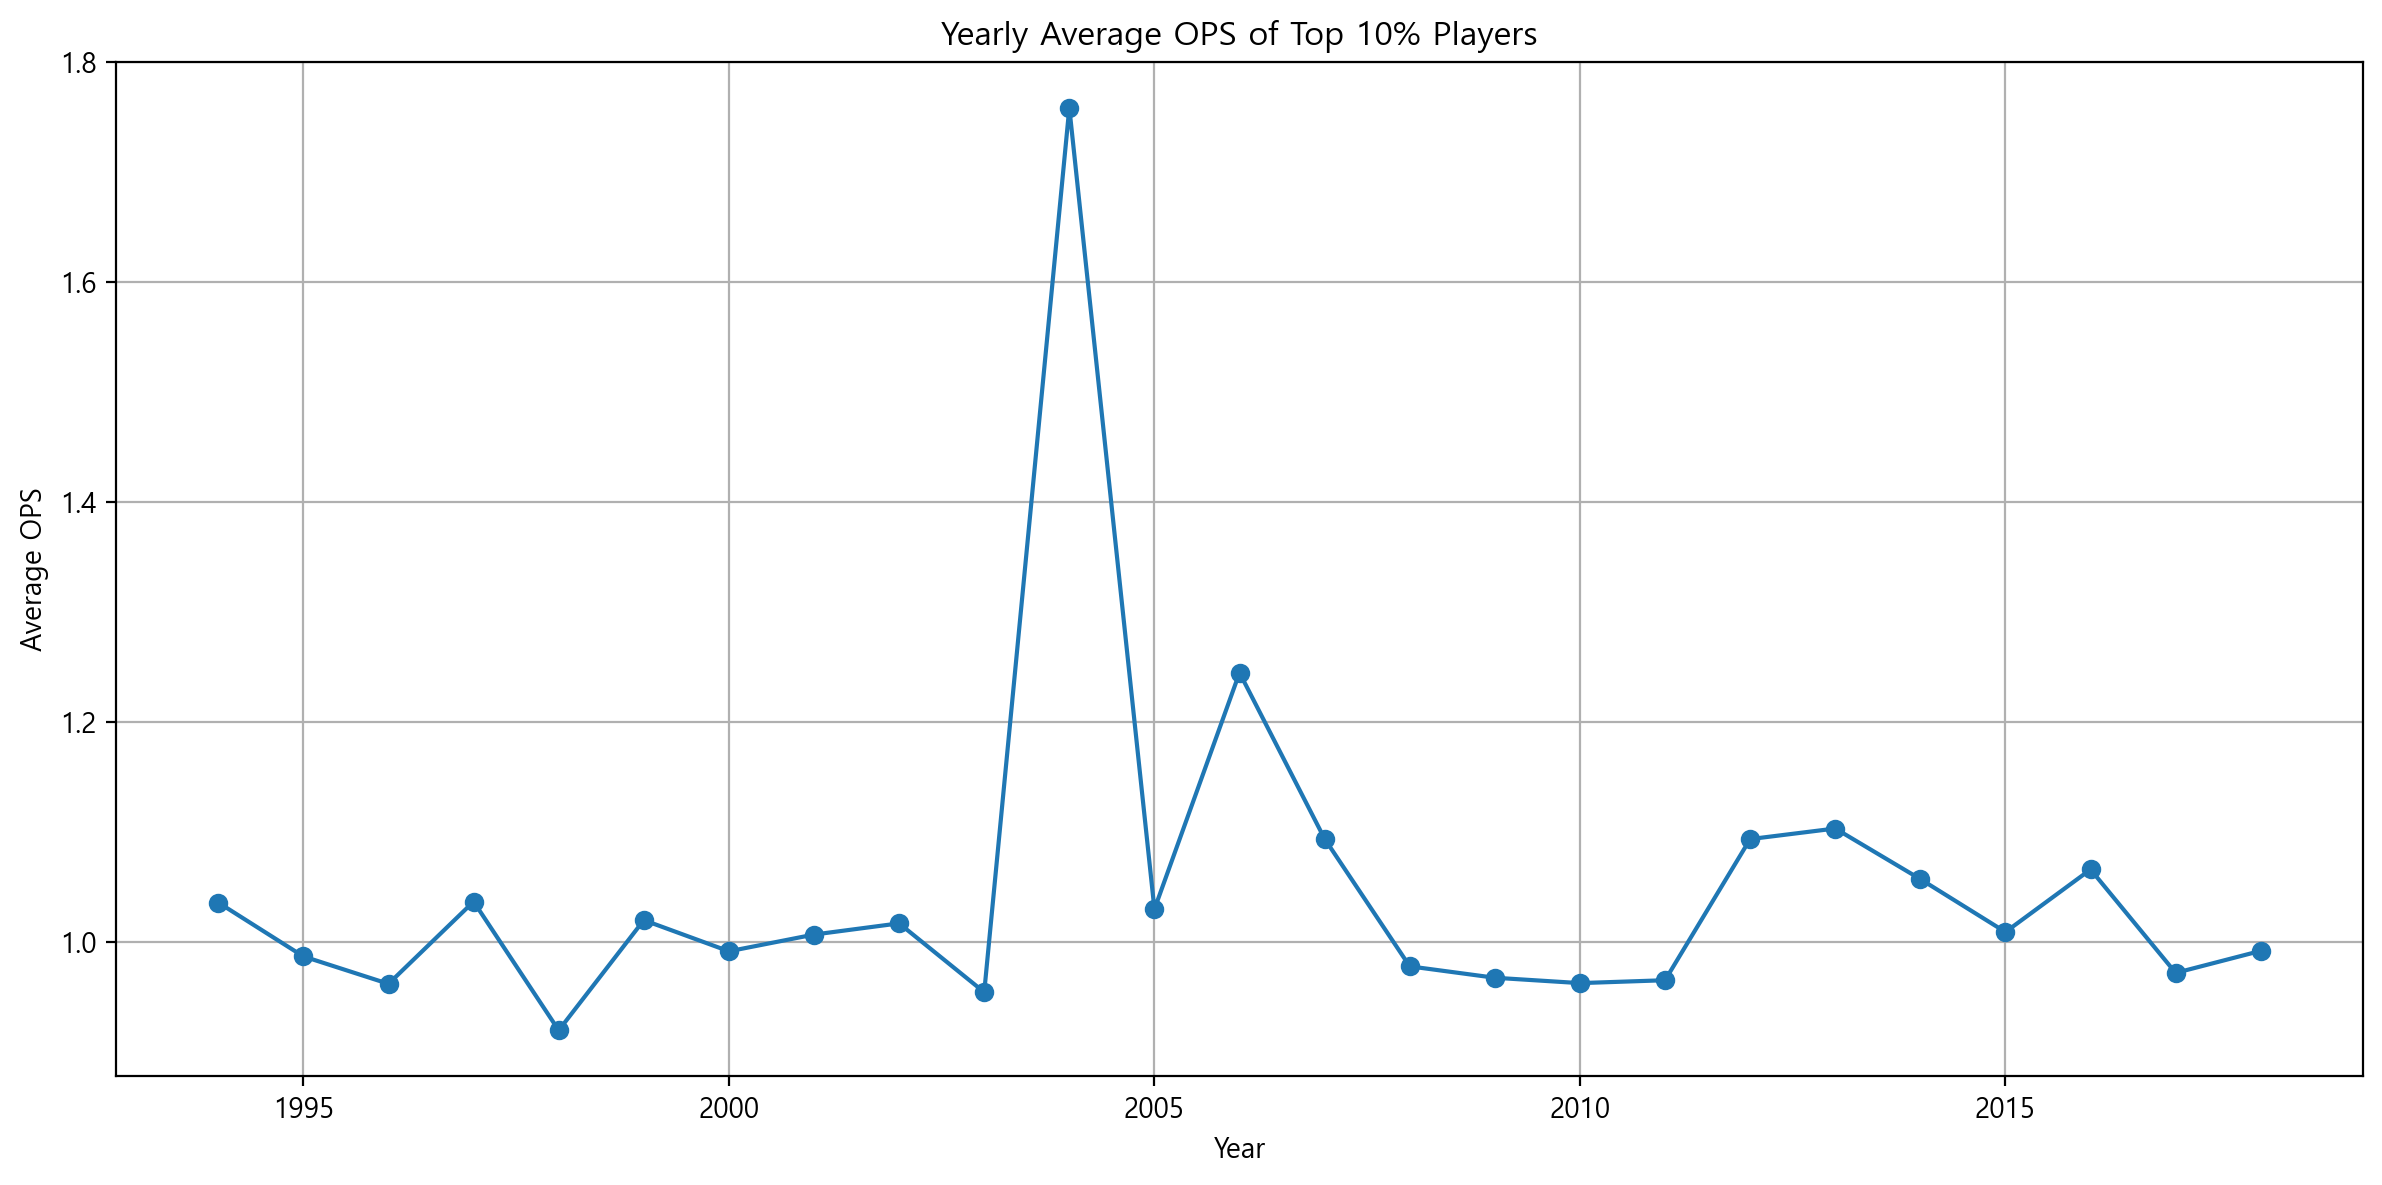

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_mean_ops['year'], yearly_mean_ops['OPS'], marker='o')
plt.title('Yearly Average OPS of Top 10% Players')
plt.xlabel('Year')
plt.ylabel('Average OPS')
plt.grid(True)
plt.tight_layout()
plt.show()

- 일반적으로 OPS 값이 연도별로 변동하는 경향이 있음을 볼 수 있음. 특히, 2004년에는 급격한 상승이 있었고, 그 후로는 대체로 안정적으로 유지
- 2004년 OPS평균이 유독 높은 이유?
    - 개별 선수의 기록 확인 : OPS 기록이 뛰어난 선수가 특별히 많아 전체 평균에 큰 영향을 미칠 가능성
    - 경기 환경의 변화 : 경기 환경이나 규칙이 변화되었을 가능성
    - 데이터 오류
    - 팀의 전략 및 선수의 기술 변화 : 특정 팀이나 선수가 새로운 전략이나 기술을 도입하여 좋은 성적을 냈을 가능성

### 2004년 유독 높은 OPS평균에 대하여 위에서 세운 가설을 검증

In [24]:
# 검증을 위해 두 개의 데이터프레임 'batter_id' and 'year' 기준으로 merge 
merged_data = pd.merge(batter_df, anal_batter, on=['batter_id', 'year'], how='inner')

merged_data

,batter_id,batter_name_x,year,team,avg,G,AB_x,R_x,H_x,2B_x,...,3B_y,HR_y,RBI_y,SB_y,CS_y,BB_y,HBP_y,SO_y,GDP_y,avg2
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0,0,0,0,0,1,0,1,0,0.333
1,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0,0,0,0,0,0,0,1,0,0.143
2,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0,0,0,0,0,0,0,0,0,0.167
3,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0,0,1,0,0,0,0,0,0,0.176
4,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0,0,3,0,0,0,0,0,1,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,2018,롯데,0.167,18,24,6,4,1,...,0,0,0,0,0,1,0,0,0,0.158
112269,344,황진수,2018,롯데,0.167,18,24,6,4,1,...,0,0,0,0,0,0,0,1,0,0.150
112270,344,황진수,2018,롯데,0.167,18,24,6,4,1,...,0,0,0,0,0,0,0,1,0,0.182
112271,344,황진수,2018,롯데,0.167,18,24,6,4,1,...,0,0,0,0,0,0,0,0,0,0.182


In [32]:
merged_data.columns

Index(['batter_id', 'batter_name_x', 'year', 'team', 'avg', 'G', 'AB_x', 'R_x',
       'H_x', '2B_x', '3B_x', 'HR_x', 'TB', 'RBI_x', 'SB_x', 'CS_x', 'BB_x',
       'HBP_x', 'SO_x', 'GDP_x', 'SLG', 'OBP', 'E', 'height/weight',
       'year_born', 'position', 'career', 'starting_salary', 'OPS',
       'batter_name_y', 'date', 'opposing_team', 'avg1', 'AB_y', 'R_y', 'H_y',
       '2B_y', '3B_y', 'HR_y', 'RBI_y', 'SB_y', 'CS_y', 'BB_y', 'HBP_y',
       'SO_y', 'GDP_y', 'avg2'],
      dtype='object')

In [25]:
merged_data.isnull().sum()

batter_id              0
batter_name_x          0
year                   0
team                   0
avg                   50
G                      0
AB_x                   0
R_x                    0
H_x                    0
2B_x                   0
3B_x                   0
HR_x                   0
TB                     0
RBI_x                  0
SB_x                   0
CS_x                   0
BB_x                   0
HBP_x                  0
SO_x                   0
GDP_x                  0
SLG                   50
OBP                   45
E                      0
height/weight          0
year_born              0
position               0
career                 0
starting_salary    16726
OPS                   50
batter_name_y          0
date                   0
opposing_team          0
avg1                   0
AB_y                   0
R_y                    0
H_y                    0
2B_y                   0
3B_y                   0
HR_y                   0
RBI_y                  0


In [39]:
# Filter merged_data for the year 2004, 2005, 2006
data_2004_merged = merged_data[merged_data['year'] == 2004]
data_2005_merged = merged_data[merged_data['year'] == 2005]
data_2006_merged = merged_data[merged_data['year'] == 2006]

# Sort players based on OPS
sorted_players_2004 = data_2004_merged[['batter_name_x', 'OPS']].sort_values(by='OPS', ascending=False)
sorted_players_2005 = data_2005_merged[['batter_name_x', 'OPS']].sort_values(by='OPS', ascending=False)
sorted_players_2006 = data_2006_merged[['batter_name_x', 'OPS']].sort_values(by='OPS', ascending=False)

sorted_players_2004  

,batter_name_x,OPS
96815,지석훈,4.0
96816,지석훈,4.0
96818,지석훈,4.0
96817,지석훈,4.0
96814,지석훈,4.0
...,...,...
14739,김재호,0.0
14738,김재호,0.0
14737,김재호,0.0
14736,김재호,0.0


In [38]:
sorted_players_2004.groupby('batter_name_x')[['OPS']].mean()

,OPS
batter_name_x,
강민호,0.000
김강민,0.494
김재호,0.000
김주형,0.487
김태균,0.941
나주환,0.791
문규현,0.000
박경수,0.736
박석민,0.429


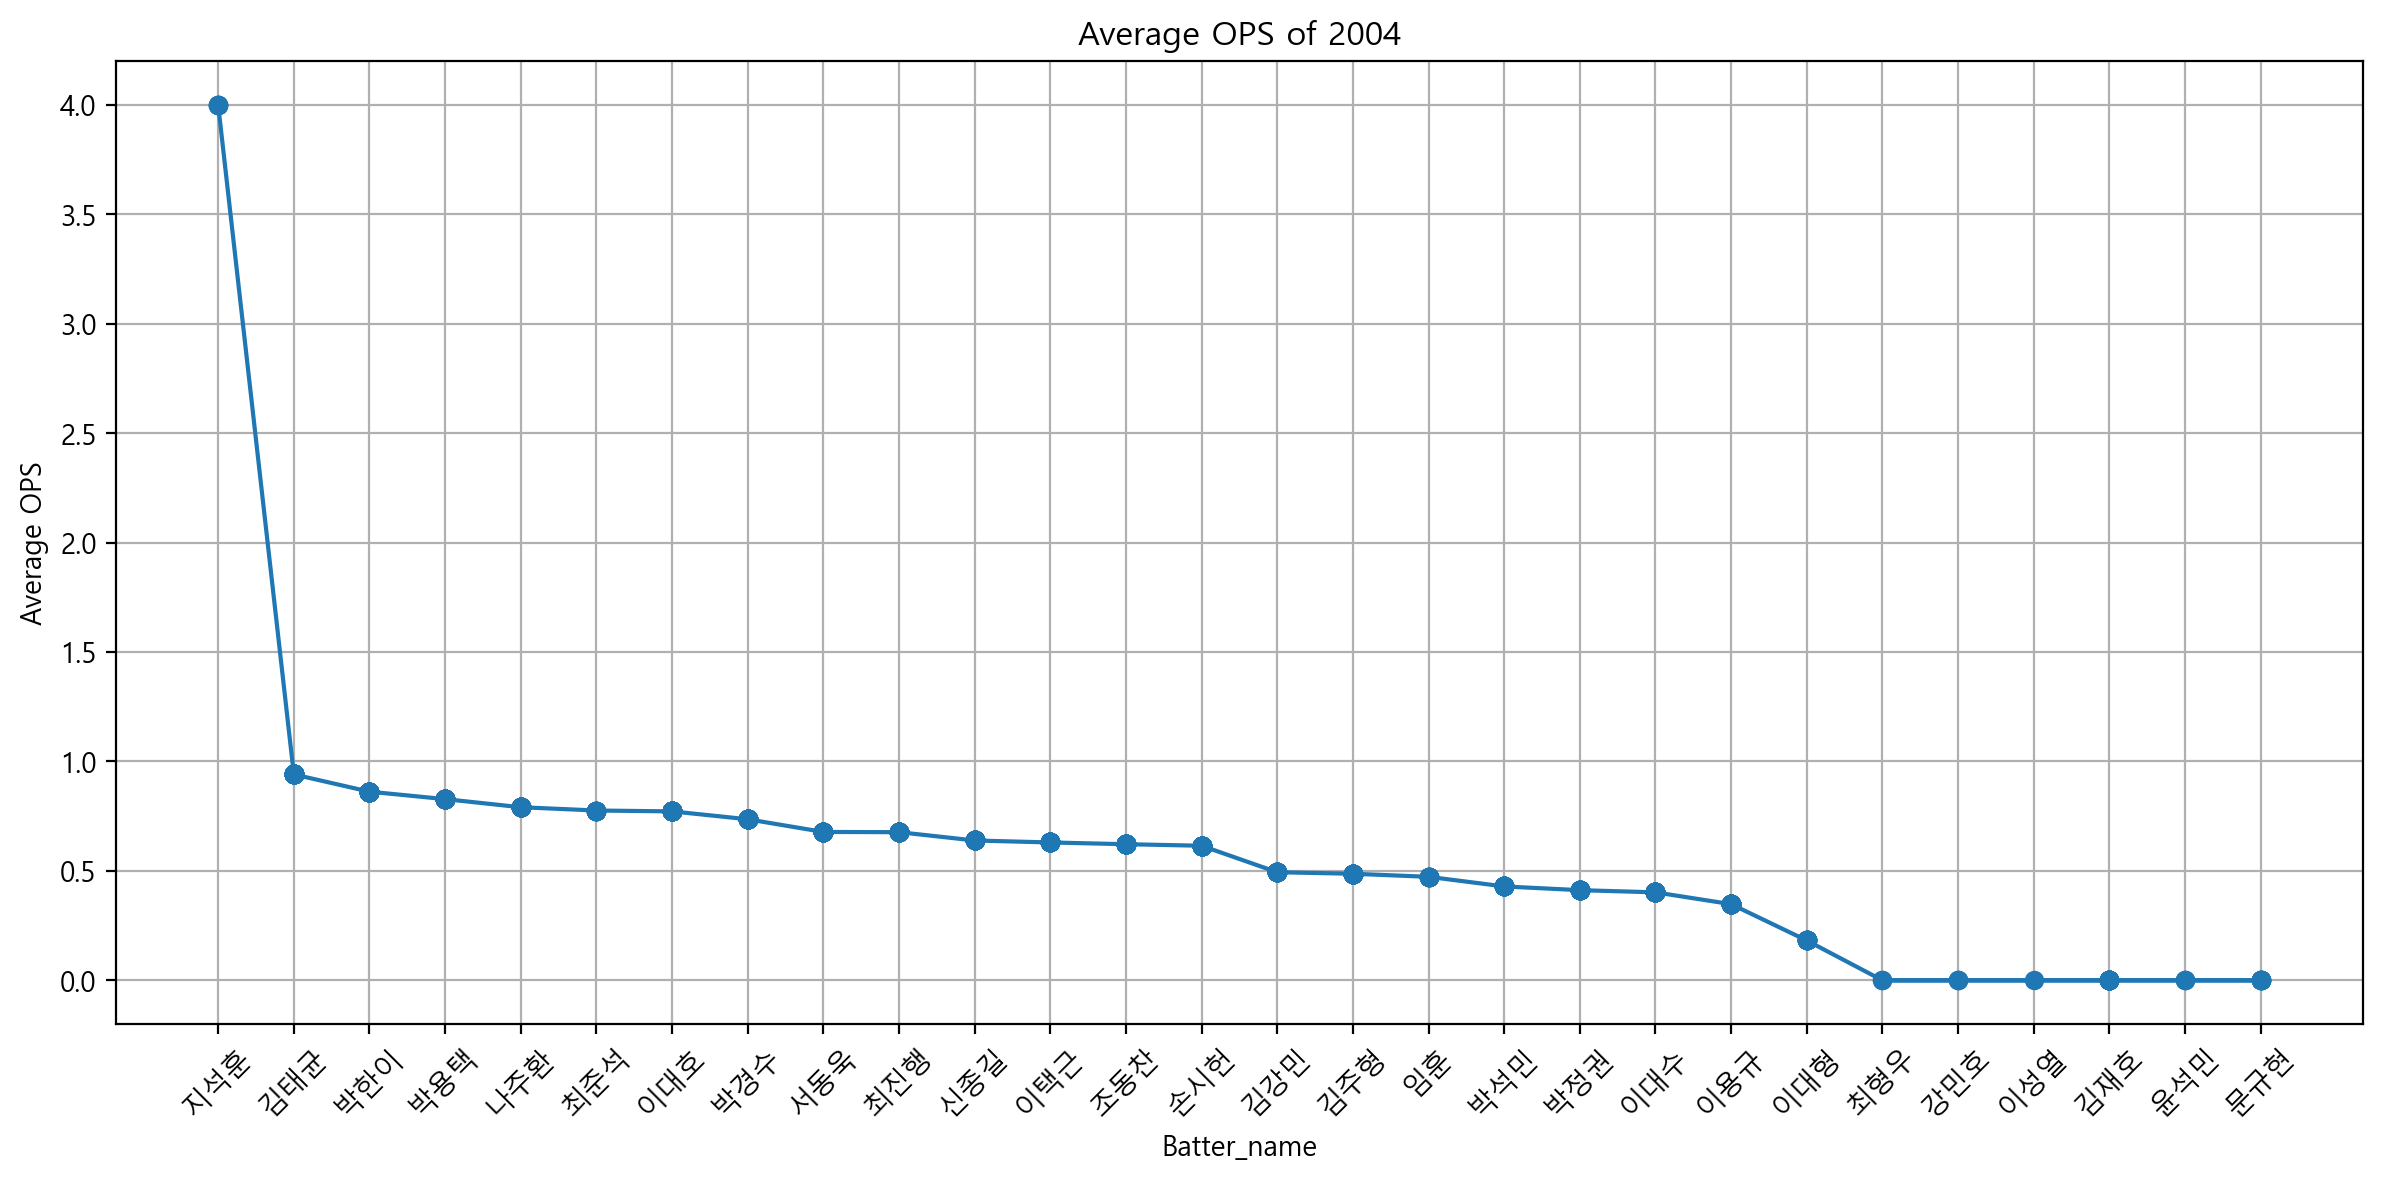

In [41]:
# 2004년 OPS 분포 확인
plt.figure(figsize=(12, 6))
plt.plot(sorted_players_2004['batter_name_x'], sorted_players_2004['OPS'], marker='o')
plt.title('Average OPS of 2004')
plt.xlabel('Batter_name')
plt.ylabel('Average OPS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

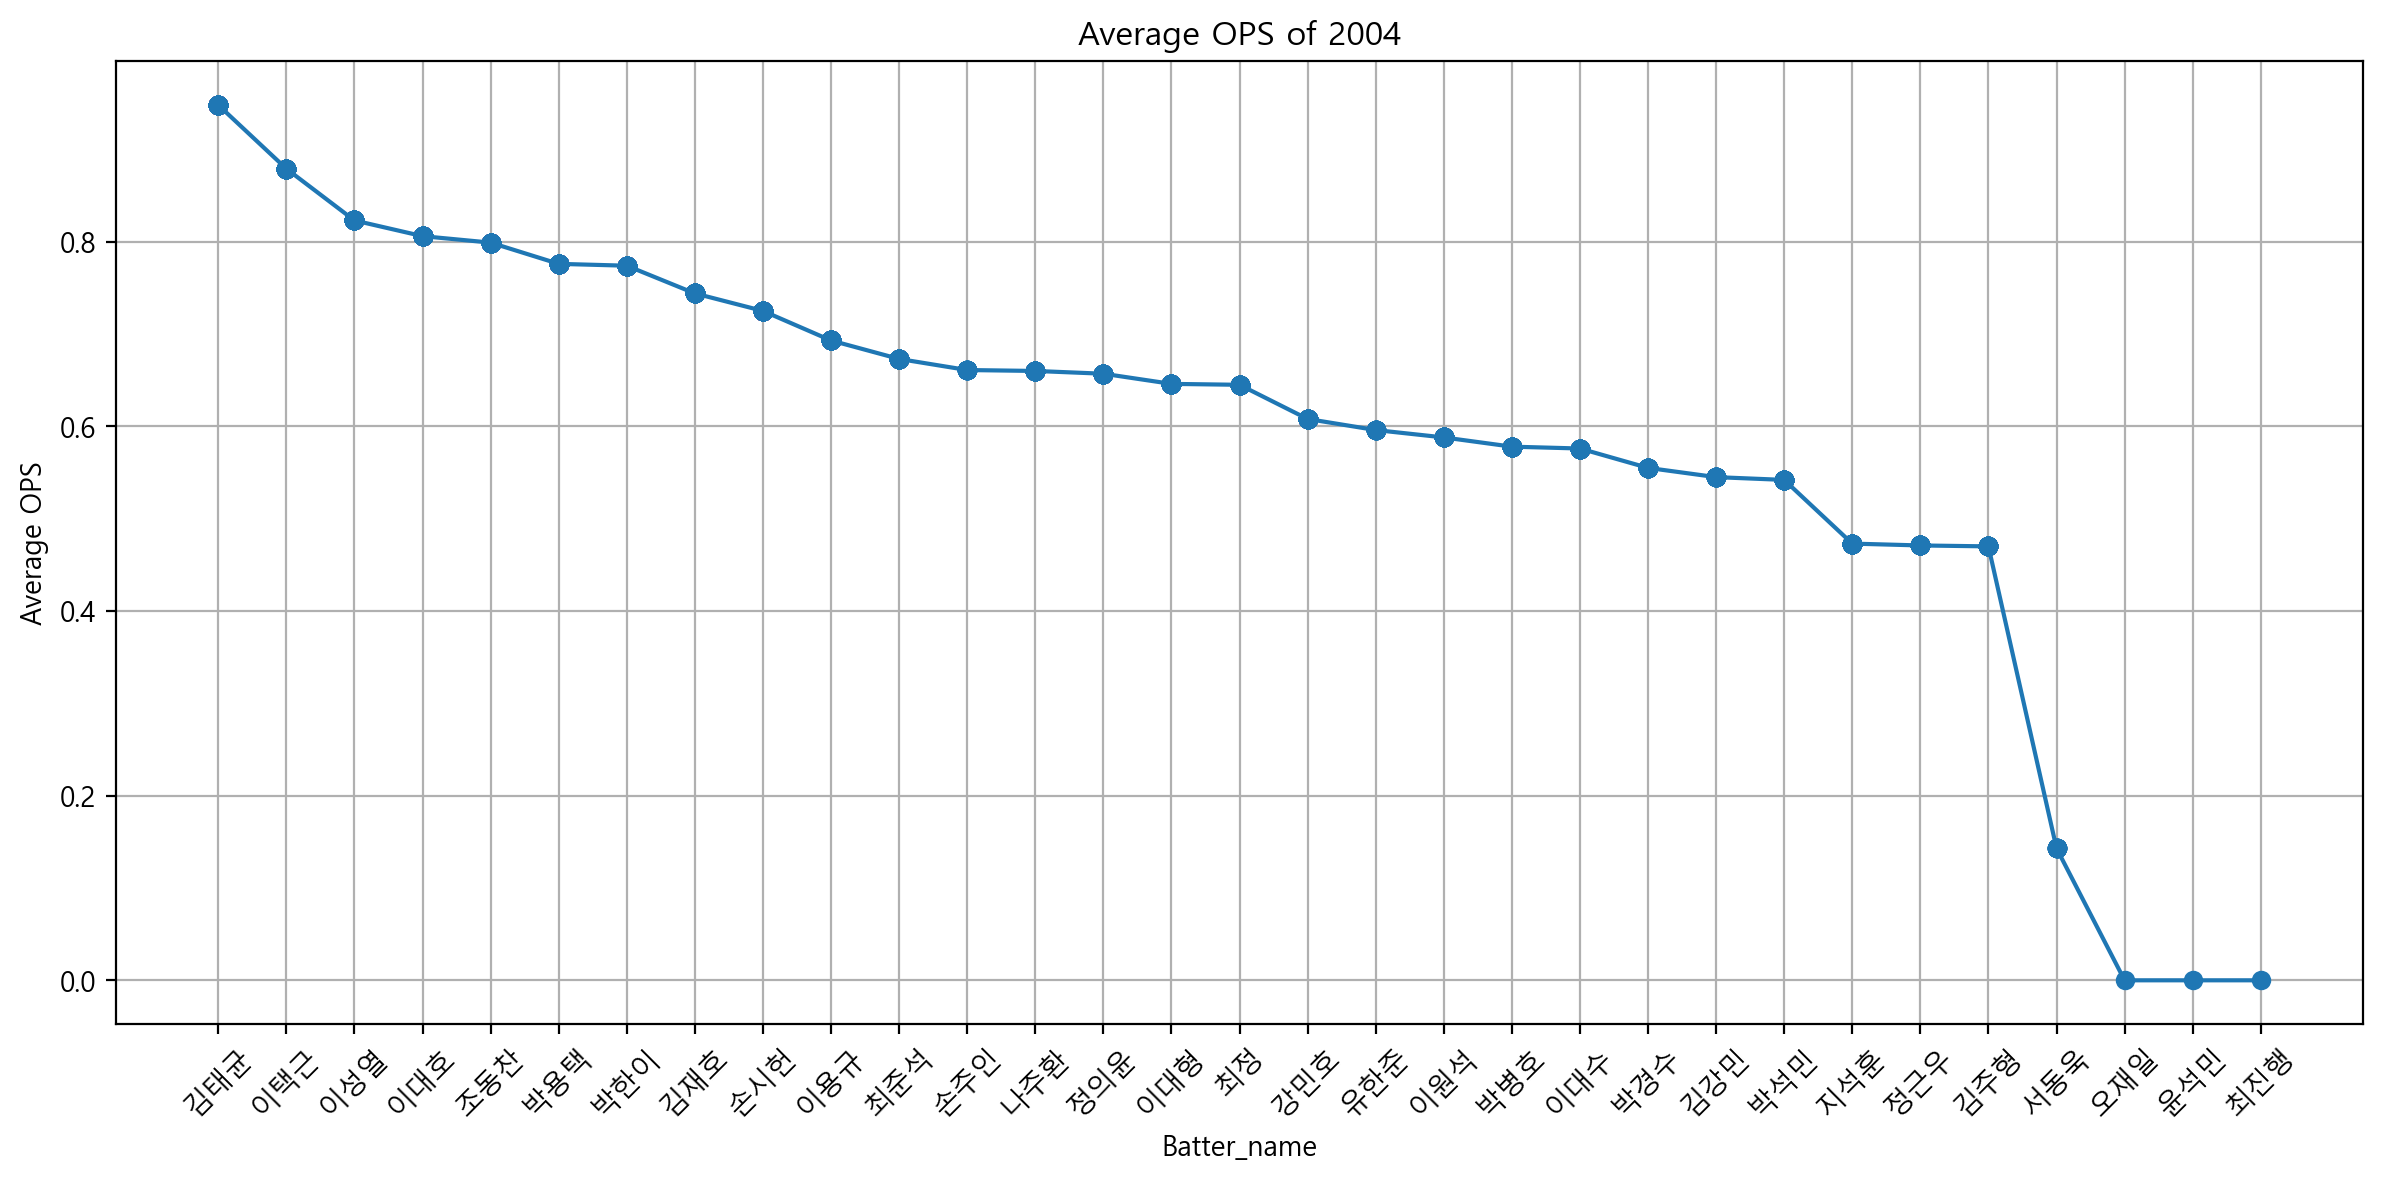

In [44]:
# 2005년 OPS 분포 확인
plt.figure(figsize=(12, 6))
plt.plot(sorted_players_2005['batter_name_x'], sorted_players_2005['OPS'], marker='o')
plt.title('Average OPS of 2004')
plt.xlabel('Batter_name')
plt.ylabel('Average OPS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

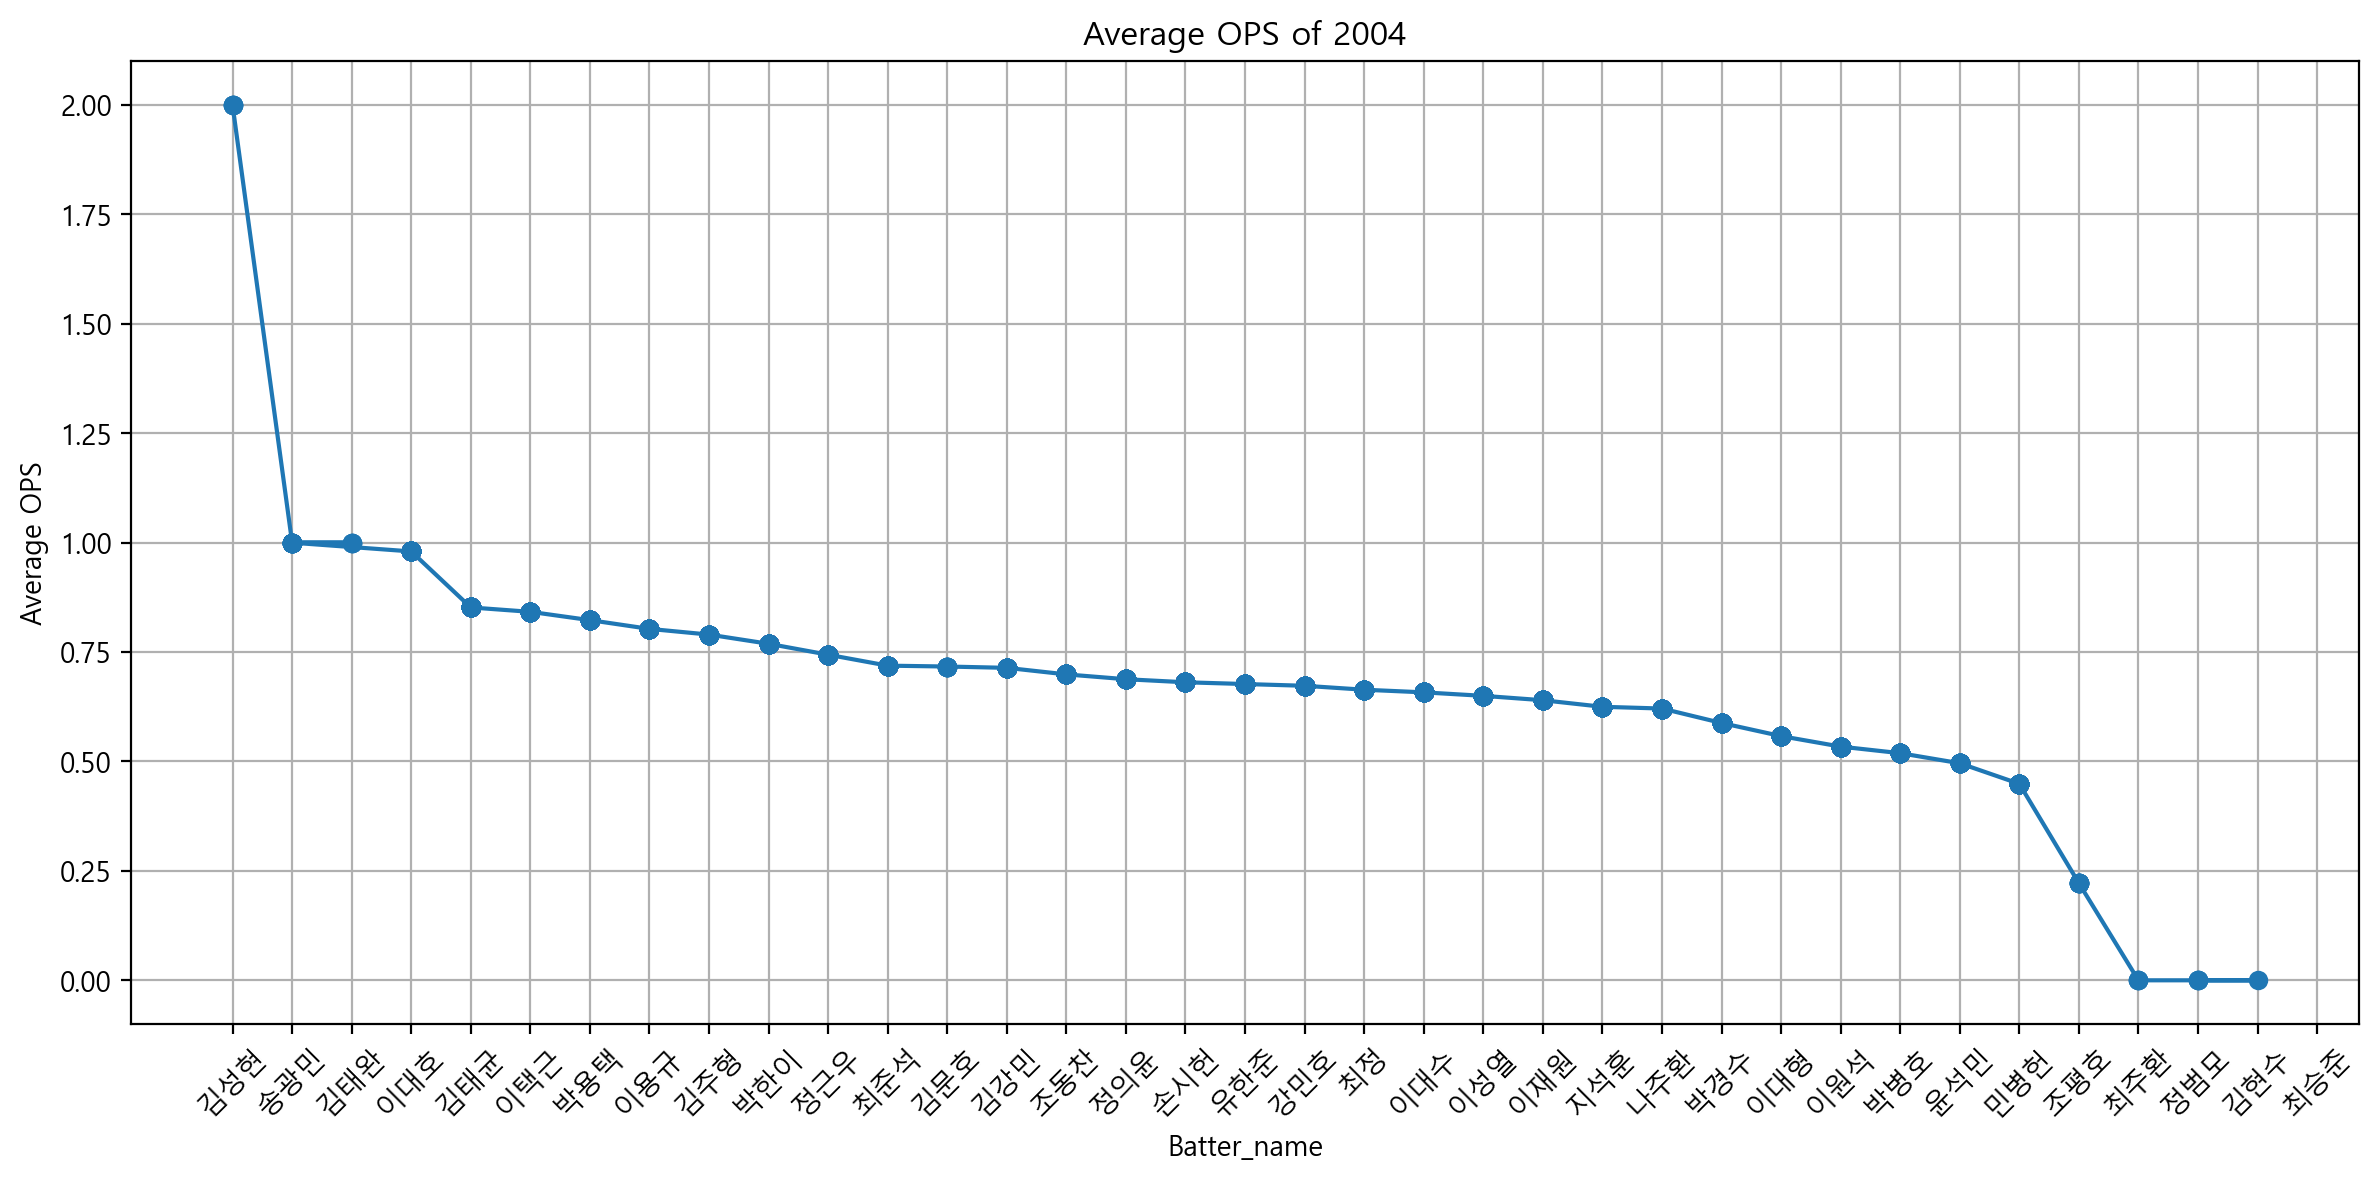

In [45]:
# 2006년 OPS 분포 확인
plt.figure(figsize=(12, 6))
plt.plot(sorted_players_2006['batter_name_x'], sorted_players_2006['OPS'], marker='o')
plt.title('Average OPS of 2004')
plt.xlabel('Batter_name')
plt.ylabel('Average OPS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- 2004년 지석훈, 2006년 김성현이 적은 타석에서 안타 등을 침으로써 높은 OPS값을 가지게 되어 전체 평균에 영향을 끼친 것으로 보임